In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#!ls "/content/drive/MyDrive/"
#!ls "/content/drive/MyDrive/Project Work-15 Credits/"
#!ls "/content/drive/MyDrive/Project Work-15 Credits/Dataset/"
#!ls "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/"
#!ls "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/exams_part0/"


ValueError: Mountpoint must not already contain files

Mounted at /content/drive


RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')

Exception ignored in: 'h5py._objects.ObjectID.__dealloc__'
Traceback (most recent call last):
  File "h5py/_objects.pyx", line 219, in h5py._objects.ObjectID._dealloc
  File "h5py/_objects.pyx", line 222, in h5py._objects.ObjectID._dealloc
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


File opened successfully!
Keys inside HDF5: ['exam_id', 'tracings']
exam_id: (20001,) int64
tracings: (20001, 4096, 12) float32
Example exam IDs: [ 590673  214626 2936711 1175521 1073151  223229 3009086  625648  218333
 1281753]
Tracings shape: (20001, 4096, 12)


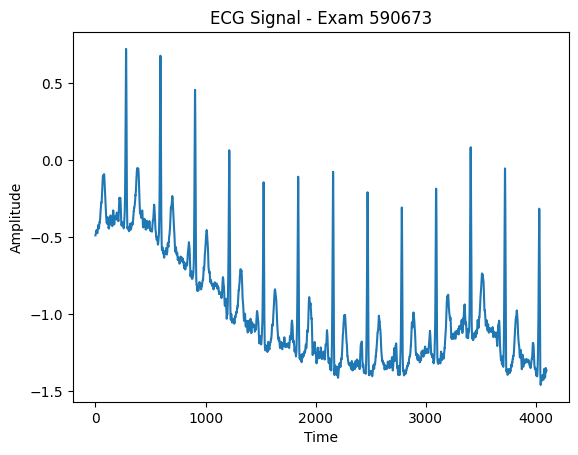

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import h5py

file_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/exams_part0/exams_part0.hdf5"

# Try loading the file
try:
    h5_file = h5py.File(file_path, 'r')
    print("File opened successfully!")
    print("Keys inside HDF5:", list(h5_file.keys()))
except Exception as e:
    print("Error:", e)

#Get Shape and Type of Each Dataset
print("exam_id:", h5_file["exam_id"].shape, h5_file["exam_id"].dtype)
print("tracings:", h5_file["tracings"].shape, h5_file["tracings"].dtype)

#Now read exam_id values
exam_ids = h5_file["exam_id"][:]
print("Example exam IDs:", exam_ids[:10])

#Now read ECG Tracing (the signal data)
tracings = h5_file["tracings"][:]
print("Tracings shape:", tracings.shape)

#Understand one sample of ECG and plot
import matplotlib.pyplot as plt

sample_index = 0   # choose any sample
ecg_sample = tracings[sample_index]

plt.plot(ecg_sample[:, 0])  # plot lead 1
plt.title(f"ECG Signal - Exam {exam_ids[sample_index]}")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()



In [ ]:
#!find "/content/drive/MyDrive" -name "*.hdf5"
#!ls "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/exams_part0"
#!find "/content/drive/MyDrive/Project Work-15 Credits/Dataset" -name "*.hdf5"
#!find "/content/drive/MyDrive/Project Work-15 Credits/Dataset" -name "*mort*"
#!find "/content/drive/MyDrive/Project Work-15 Credits/Dataset" -name "*.csv"
#!find "/content/drive/MyDrive/Project Work-15 Credits/Dataset" -name "*.hdf5"
import pandas as pd

labels_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"

labels_df = pd.read_csv(labels_path)
labels_df.head()



,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5
1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5
2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5
3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5
4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5


Mounted at /content/drive
Labels columns: Index(['exam_id', 'age', 'is_male', 'nn_predicted_age', '1dAVb', 'RBBB',
       'LBBB', 'SB', 'ST', 'AF', 'patient_id', 'death', 'timey', 'normal_ecg',
       'trace_file'],
      dtype='object')
Example labels:
Loading part 1...
Total exams loaded: 20001
Tracings shape: (20001, 4096, 12)
Matched X shape: (20000, 4096, 12)
Matched y shape: (20000,)


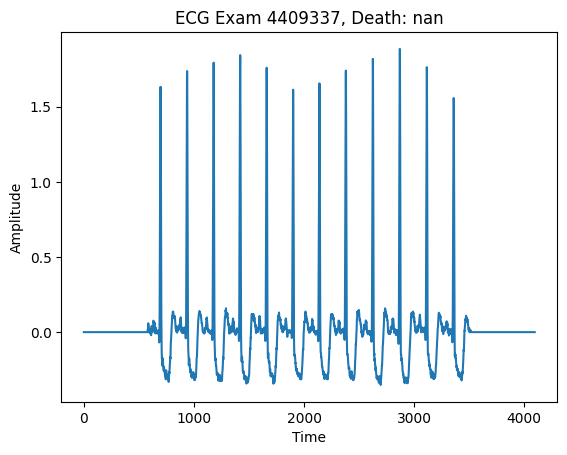

In [ ]:
# -----------------------------
# Step 1: Mount Google Drive
# -----------------------------
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# -----------------------------
# Step 2: Import Libraries
# -----------------------------
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Step 3: Load labels
# -----------------------------
labels_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
labels_df = pd.read_csv(labels_path)
print("Labels columns:", labels_df.columns)
print("Example labels:")
labels_df.head()

# -----------------------------
# Step 4: Define function to load HDF5 parts
# -----------------------------
def load_hdf5_part(part_num):
    file_path = f"/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/exams_part{part_num}/exams_part{part_num}.hdf5"
    with h5py.File(file_path, 'r') as h5_file:
        exam_ids = h5_file['exam_id'][:]
        tracings = h5_file['tracings'][:]
    return exam_ids, tracings

# -----------------------------
# Step 5: Load parts 0 → 5
# -----------------------------
all_exam_ids = []
all_tracings = []

for part in range(1, 2):  # part0 to part5
    print(f"Loading part {part}...")
    exam_ids, tracings = load_hdf5_part(part)
    all_exam_ids.append(exam_ids)
    all_tracings.append(tracings)

# Concatenate all parts
all_exam_ids = np.concatenate(all_exam_ids, axis=0)
all_tracings = np.concatenate(all_tracings, axis=0)

print("Total exams loaded:", all_exam_ids.shape[0])
print("Tracings shape:", all_tracings.shape)

# -----------------------------
# Step 6: Match tracings with mortality labels
# -----------------------------
# Create a DataFrame for all HDF5 exam_ids
df_tracings = pd.DataFrame({'exam_id': all_exam_ids, 'index': np.arange(len(all_exam_ids))})

# Merge with CSV labels on exam_id
df_merged = df_tracings.merge(labels_df[['exam_id','death']], on='exam_id', how='inner')

# Use indices to select matching tracings
X = all_tracings[df_merged['index'].values]  # shape: (num_matched_samples, 4096, 12)
y = df_merged['death'].values                # shape: (num_matched_samples,)

print("Matched X shape:", X.shape)
print("Matched y shape:", y.shape)

# -----------------------------
# Step 7: Visualize a sample ECG with label
# -----------------------------
sample_index = 0
plt.plot(X[sample_index][:, 0])  # lead 1
plt.title(f"ECG Exam {df_merged.loc[sample_index, 'exam_id']}, Death: {y[sample_index]}")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
import os
import h5py
import numpy as np
import pandas as pd

# =========================
# CONFIGURATION
# =========================
labels_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
hdf5_base_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"
parts_to_load = range(0, 2)  # parts 0-2
batch_size = 500               # safe for Colab memory
output_file = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/ecg_dataset.npz"

# =========================
# LOAD LABELS
# =========================
labels_df = pd.read_csv(labels_path)
labels_df = labels_df.dropna(subset=['death'])
valid_exam_ids = set(labels_df['exam_id'].values)
print(f"Total exams after dropping NaN death labels: {len(valid_exam_ids)}")

# =========================
# FUNCTION TO PROCESS BATCHES
# =========================
def process_hdf5_in_batches(part_num, batch_size=batch_size):
    file_path = os.path.join(hdf5_base_path, f"exams_part{part_num}", f"exams_part{part_num}.hdf5")
    if not os.path.exists(file_path):
        print(f"Part {part_num} missing, skipping...")
        return [], []

    all_exam_ids = []
    all_tracings = []
    all_labels = []

    with h5py.File(file_path, 'r') as h5_file:
        exam_ids_all = h5_file['exam_id']
        tracings_all = h5_file['tracings']
        n_total = exam_ids_all.shape[0]
        print(f"Part {part_num}: {n_total} exams found")

        for start in range(0, n_total, batch_size):
            end = min(start + batch_size, n_total)
            exam_ids = exam_ids_all[start:end]
            mask = np.isin(exam_ids, list(valid_exam_ids))
            exam_ids = exam_ids[mask]
            if len(exam_ids) == 0:
                continue
            tracings = tracings_all[start:end][mask]

            # Merge with labels
            batch_df = pd.DataFrame({'exam_id': exam_ids})
            batch_df = batch_df.merge(labels_df[['exam_id', 'death']], on='exam_id', how='inner')
            y = batch_df['death'].values

            all_exam_ids.append(exam_ids)
            all_tracings.append(tracings)
            all_labels.append(y)

            print(f"Processed batch {start}-{end}, {len(exam_ids)} valid exams")

    if len(all_exam_ids) == 0:
        return [], [], []

    # Concatenate all batches of this part
    return np.concatenate(all_exam_ids), np.concatenate(all_tracings), np.concatenate(all_labels)

# =========================
# LOAD ALL PARTS BATCH-WISE
# =========================
all_exam_ids = []
all_tracings = []
all_labels = []

for part in parts_to_load:
    exam_ids, tracings, labels = process_hdf5_in_batches(part, batch_size)
    if len(exam_ids) == 0:
        continue
    all_exam_ids.append(exam_ids)
    all_tracings.append(tracings)
    all_labels.append(labels)

# =========================
# CONCATENATE EVERYTHING
# =========================
all_exam_ids = np.concatenate(all_exam_ids)
all_tracings = np.concatenate(all_tracings)
all_labels = np.concatenate(all_labels)

print(f"Total loaded exams: {len(all_exam_ids)}")
print(f"Tracings shape: {all_tracings.shape}")
print(f"Labels shape: {all_labels.shape}")

# =========================
# COUNT DEATHS
# =========================
death_count = np.sum(all_labels)
alive_count = len(all_labels) - death_count
print(f"Number of deaths: {death_count}")
print(f"Number of alive: {alive_count}")
print(f"Death ratio: {death_count / len(all_labels):.4f}")

# =========================
# SAVE TO NPZ
# =========================
np.savez_compressed(output_file, exam_ids=all_exam_ids, tracings=all_tracings, labels=all_labels)
print(f"Dataset saved to {output_file}")

Total exams after dropping NaN death labels: 233647
Part 0: 20001 exams found
Processed batch 0-500, 357 valid exams
Processed batch 500-1000, 356 valid exams
Processed batch 1000-1500, 356 valid exams
Processed batch 1500-2000, 344 valid exams
Processed batch 2000-2500, 356 valid exams
Processed batch 2500-3000, 351 valid exams
Processed batch 3000-3500, 356 valid exams
Processed batch 3500-4000, 343 valid exams
Processed batch 4000-4500, 361 valid exams
Processed batch 4500-5000, 341 valid exams
Processed batch 5000-5500, 349 valid exams
Processed batch 5500-6000, 350 valid exams
Processed batch 6000-6500, 343 valid exams
Processed batch 6500-7000, 370 valid exams
Processed batch 7000-7500, 359 valid exams
Processed batch 7500-8000, 356 valid exams
Processed batch 8000-8500, 344 valid exams
Processed batch 8500-9000, 352 valid exams
Processed batch 9000-9500, 362 valid exams
Processed batch 9500-10000, 359 valid exams
Processed batch 10000-10500, 359 valid exams
Processed batch 10500

In [ ]:
import os
import h5py
import numpy as np
import pandas as pd
from tqdm import tqdm

# -----------------------------
# CONFIGURATION
# -----------------------------
DATASET_DIR = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"
LABELS_PATH = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
BATCH_SIZE = 500

# -----------------------------
# LOAD LABELS
# -----------------------------
labels_df = pd.read_csv(LABELS_PATH)
labels_df = labels_df.dropna(subset=['death'])
labels_df['exam_id'] = labels_df['exam_id'].astype(str)

print(f"Total exams after dropping NaN death labels: {len(labels_df)}")
print(f"Columns in labels: {labels_df.columns}")

# -----------------------------
# HELPER: LOAD SINGLE HDF5 PART BATCH-WISE
# -----------------------------
def load_hdf5_part_batchwise(part_num, valid_exam_ids, batch_size=500):
    part_dir = os.path.join(DATASET_DIR, f"exams_part{part_num}")
    file_path = os.path.join(part_dir, f"exams_part{part_num}.hdf5")

    if not os.path.exists(file_path):
        print(f"[Warning] File not found: {file_path}. Skipping part {part_num}.")
        return np.empty((0, 4096, 12)), np.empty((0,))

    with h5py.File(file_path, 'r') as h5_file:
        print(f"Keys in HDF5 file part {part_num}: {list(h5_file.keys())}")

        # Detect dataset names automatically
        if 'tracings' in h5_file:
            tracings_ds = h5_file['tracings']
        elif 'tracing' in h5_file:
            tracings_ds = h5_file['tracing']
        else:
            raise KeyError("No dataset named 'tracing' or 'tracings' found in HDF5 file.")

        exam_ids_ds = h5_file['exam_id'][:].astype(str)
        exam_id_to_idx = {eid: idx for idx, eid in enumerate(exam_ids_ds)}

        # Filter only valid exam_ids
        valid_ids_in_file = [eid for eid in valid_exam_ids if eid in exam_id_to_idx]
        total_exams = len(valid_ids_in_file)

        all_tracings = []
        all_labels = []

        for start in range(0, total_exams, batch_size):
            end = min(start + batch_size, total_exams)
            batch_ids = valid_ids_in_file[start:end]

            batch_tracings = []
            batch_labels = []

            for eid in batch_ids:
                idx = exam_id_to_idx[eid]
                tracing = tracings_ds[idx]
                label = labels_df.loc[labels_df['exam_id'] == eid, 'death'].values[0]
                batch_tracings.append(tracing)
                batch_labels.append(label)

            all_tracings.append(np.array(batch_tracings))
            all_labels.append(np.array(batch_labels))

            print(f"Processed batch {start}-{end}, {len(batch_tracings)} valid exams")

        all_tracings = np.concatenate(all_tracings, axis=0)
        all_labels = np.concatenate(all_labels, axis=0)

        return all_tracings, all_labels

# -----------------------------
# LOAD ALL PARTS
# -----------------------------
parts_to_load = [0]  # Update according to available parts
all_tracings = []
all_labels = []

for part in parts_to_load:
    print(f"Loading part {part}...")
    tracings, labels = load_hdf5_part_batchwise(part, labels_df['exam_id'].values, batch_size=BATCH_SIZE)
    if tracings.size > 0:
        all_tracings.append(tracings)
        all_labels.append(labels)

if all_tracings:
    all_tracings = np.concatenate(all_tracings, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
else:
    all_tracings = np.empty((0, 4096, 12))
    all_labels = np.empty((0,))

print(f"Total loaded exams: {len(all_labels)}")
print(f"Tracings shape: {all_tracings.shape}")
print(f"Labels shape: {all_labels.shape}")

# -----------------------------
# COMPUTE DEATH COUNT
# -----------------------------
num_deaths = np.sum(all_labels == 1)
num_alive = np.sum(all_labels == 0)
death_ratio = num_deaths / len(all_labels) if len(all_labels) > 0 else 0

print(f"Number of deaths: {num_deaths}")
print(f"Number of alive: {num_alive}")
print(f"Death ratio: {death_ratio:.4f}")

Total exams after dropping NaN death labels: 233647
Columns in labels: Index(['exam_id', 'age', 'is_male', 'nn_predicted_age', '1dAVb', 'RBBB',
       'LBBB', 'SB', 'ST', 'AF', 'patient_id', 'death', 'timey', 'normal_ecg',
       'trace_file'],
      dtype='object')
Loading part 0...
Keys in HDF5 file part 0: ['exam_id', 'tracings']
Processed batch 0-500, 500 valid exams
Processed batch 500-1000, 500 valid exams
Processed batch 1000-1500, 500 valid exams
Processed batch 1500-2000, 500 valid exams
Processed batch 2000-2500, 500 valid exams
Processed batch 2500-3000, 500 valid exams
Processed batch 3000-3500, 500 valid exams
Processed batch 3500-4000, 500 valid exams
Processed batch 4000-4500, 500 valid exams
Processed batch 4500-5000, 500 valid exams
Processed batch 5000-5500, 500 valid exams
Processed batch 5500-6000, 500 valid exams
Processed batch 6000-6500, 500 valid exams
Processed batch 6500-7000, 500 valid exams
Processed batch 7000-7500, 500 valid exams
Processed batch 7500-8000

In [ ]:
import os
import h5py
import pandas as pd
import numpy as np

# ----------------------------
# Config
# ----------------------------
DATASET_DIR = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"
LABELS_PATH = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
PART_NUM = 0
BATCH_SIZE = 500

# ----------------------------
# Load labels
# ----------------------------
labels_df = pd.read_csv(LABELS_PATH)

# Drop rows with NaN death labels if needed
labels_df = labels_df.dropna(subset=['death'])

print(f"Total exams after dropping NaN death labels: {len(labels_df)}")
print(f"Columns in labels: {labels_df.columns}")

# ----------------------------
# Load Part 0 HDF5 dataset batch-wise
# ----------------------------
part_file_path = os.path.join(DATASET_DIR, f"exams_part{PART_NUM}", f"exams_part{PART_NUM}.hdf5")

patient_ids_list = []

with h5py.File(part_file_path, 'r') as f:
    all_exam_ids = f['exam_id'][:].astype(str)
    num_exams = len(all_exam_ids)

    print(f"Loading Part {PART_NUM}: {num_exams} exams found")

    # Loop in batches
    for start_idx in range(0, num_exams, BATCH_SIZE):
        end_idx = min(start_idx + BATCH_SIZE, num_exams)
        batch_exam_ids = all_exam_ids[start_idx:end_idx]

        # Filter labels for this batch
        batch_labels = labels_df[labels_df['exam_id'].astype(str).isin(batch_exam_ids)]

        # Collect patient_ids
        patient_ids_list.extend(batch_labels['patient_id'].tolist())

        print(f"Processed batch {start_idx}-{end_idx}, {len(batch_labels)} valid exams")

# ----------------------------
# Count exams per patient
# ----------------------------
patient_exam_counts = pd.Series(patient_ids_list).value_counts().reset_index()
patient_exam_counts.columns = ['patient_id', 'num_exams']

print("\nTop patients with most exams in Part 0:")
print(patient_exam_counts.head(20))

Total exams after dropping NaN death labels: 233647
Columns in labels: Index(['exam_id', 'age', 'is_male', 'nn_predicted_age', '1dAVb', 'RBBB',
       'LBBB', 'SB', 'ST', 'AF', 'patient_id', 'death', 'timey', 'normal_ecg',
       'trace_file'],
      dtype='object')
Loading Part 0: 20001 exams found
Processed batch 0-500, 357 valid exams
Processed batch 500-1000, 356 valid exams
Processed batch 1000-1500, 356 valid exams
Processed batch 1500-2000, 344 valid exams
Processed batch 2000-2500, 356 valid exams
Processed batch 2500-3000, 351 valid exams
Processed batch 3000-3500, 356 valid exams
Processed batch 3500-4000, 343 valid exams
Processed batch 4000-4500, 361 valid exams
Processed batch 4500-5000, 341 valid exams
Processed batch 5000-5500, 349 valid exams
Processed batch 5500-6000, 350 valid exams
Processed batch 6000-6500, 343 valid exams
Processed batch 6500-7000, 370 valid exams
Processed batch 7000-7500, 359 valid exams
Processed batch 7500-8000, 356 valid exams
Processed batch 

In [ ]:
#Read Dataset and then save in excel file
import os
import h5py
import numpy as np
import pandas as pd

# =========================
# CONFIGURATION
# =========================
labels_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
hdf5_base_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"
parts_to_load = range(0, 2)     # change to range(0, 6) for parts 0–5
batch_size = 500

excel_output = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/ecg_dataset_report.xlsx"
npz_output = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/ecg_dataset.npz"

# =========================
# LOAD LABELS
# =========================
labels_df = pd.read_csv(labels_path)
labels_header_df = pd.DataFrame(labels_df.columns, columns=["columns"])

labels_df = labels_df.dropna(subset=['death'])
valid_exam_ids = set(labels_df['exam_id'].astype(str).tolist())

print(f"Total exams after dropping NaN death labels: {len(valid_exam_ids)}")

# =========================
# FUNCTION TO PROCESS HDF5 IN BATCHES
# =========================
def process_hdf5_in_batches(part_num, batch_size=batch_size):
    part_path = os.path.join(hdf5_base_path, f"exams_part{part_num}", f"exams_part{part_num}.hdf5")

    if not os.path.exists(part_path):
        print(f"❌ Part {part_num} missing, skipping...")
        return [], [], [], 0

    all_ids, all_tracings, all_labels = [], [], []
    valid_count = 0

    with h5py.File(part_path, "r") as f:
        exam_ids_all = f["exam_id"][:].astype(str)     # 🔥 convert here
        tracings_all = f["tracings"]
        total = len(exam_ids_all)

        print(f"Part {part_num}: {total} exams found")

        for start in range(0, total, batch_size):
            end = min(start + batch_size, total)

            batch_ids = exam_ids_all[start:end]
            mask = np.isin(batch_ids, list(valid_exam_ids))

            batch_ids = batch_ids[mask]
            if len(batch_ids) == 0:
                continue

            batch_tracings = tracings_all[start:end][mask]

            # ---- FIX: Convert labels to string before merge ----
            batch_df = pd.DataFrame({"exam_id": batch_ids.astype(str)})

            labels_str_df = labels_df.copy()
            labels_str_df["exam_id"] = labels_str_df["exam_id"].astype(str)

            batch_df = batch_df.merge(labels_str_df[["exam_id", "death"]], on="exam_id", how="inner")

            y = batch_df["death"].values

            all_ids.append(batch_ids)
            all_tracings.append(batch_tracings)
            all_labels.append(y)

            valid_count += len(batch_ids)
            print(f"  Processed {start}-{end}: {len(batch_ids)} valid")

    if valid_count == 0:
        return [], [], [], 0

    return (
        np.concatenate(all_ids),
        np.concatenate(all_tracings),
        np.concatenate(all_labels),
        valid_count
    )

# =========================
# LOAD ALL PARTS
# =========================
all_exam_ids, all_tracings, all_labels = [], [], []
summary_rows = []

for part in parts_to_load:
    ids, tracings, labels, count = process_hdf5_in_batches(part, batch_size)

    summary_rows.append({
        "dataset_part": f"part{part}",
        "valid_exam_count": count
    })

    if count > 0:
        all_exam_ids.append(ids)
        all_tracings.append(tracings)
        all_labels.append(labels)

# =========================
# CONCAT GLOBAL DATA
# =========================
all_exam_ids = np.concatenate(all_exam_ids)
all_tracings = np.concatenate(all_tracings)
all_labels = np.concatenate(all_labels)

print(f"\nTotal loaded exams: {len(all_exam_ids)}")
print(f"Tracings shape: {all_tracings.shape}")
print(f"Labels shape: {all_labels.shape}")

# =========================
# DEATH SUMMARY
# =========================
death_count = int(np.sum(all_labels))
alive_count = len(all_labels) - death_count

final_summary_df = pd.DataFrame({
    "total_exams_loaded": [len(all_labels)],
    "death_count": [death_count],
    "alive_count": [alive_count],
    "death_ratio": [death_count / len(all_labels)]
})

# =========================
# FULL EXAM LIST TABLE
# =========================
full_exam_list_df = pd.DataFrame({
    "exam_id": all_exam_ids,
    "death": all_labels
})

# =========================
# SAVE EVERYTHING TO EXCEL
# =========================
with pd.ExcelWriter(excel_output) as writer:
    labels_header_df.to_excel(writer, sheet_name="exams_header", index=False)
    pd.DataFrame(summary_rows).to_excel(writer, sheet_name="part_summary", index=False)
    final_summary_df.to_excel(writer, sheet_name="final_counts", index=False)
    full_exam_list_df.to_excel(writer, sheet_name="loaded_exam_list", index=False)

print(f"\n📁 Excel report saved to: {excel_output}")

# =========================
# SAVE NPZ DATASET
# =========================
np.savez_compressed(npz_output, exam_ids=all_exam_ids, tracings=all_tracings, labels=all_labels)
print(f"📦 NPZ dataset saved to: {npz_output}")


Total exams after dropping NaN death labels: 233647
Part 0: 20001 exams found
  Processed 0-500: 357 valid
  Processed 500-1000: 356 valid
  Processed 1000-1500: 356 valid
  Processed 1500-2000: 344 valid
  Processed 2000-2500: 356 valid
  Processed 2500-3000: 351 valid
  Processed 3000-3500: 356 valid
  Processed 3500-4000: 343 valid
  Processed 4000-4500: 361 valid
  Processed 4500-5000: 341 valid
  Processed 5000-5500: 349 valid
  Processed 5500-6000: 350 valid
  Processed 6000-6500: 343 valid
  Processed 6500-7000: 370 valid
  Processed 7000-7500: 359 valid
  Processed 7500-8000: 356 valid
  Processed 8000-8500: 344 valid
  Processed 8500-9000: 352 valid
  Processed 9000-9500: 362 valid
  Processed 9500-10000: 359 valid
  Processed 10000-10500: 359 valid
  Processed 10500-11000: 351 valid
  Processed 11000-11500: 359 valid
  Processed 11500-12000: 347 valid
  Processed 12000-12500: 344 valid
  Processed 12500-13000: 357 valid
  Processed 13000-13500: 352 valid
  Processed 13500-140

KeyboardInterrupt: 

In [ ]:
import os
import h5py
import numpy as np
import pandas as pd

# ======================================
# CONFIG
# ======================================
labels_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
hdf5_base_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"

parts_to_load = range(0, 1)
batch_size = 500

npz_folder = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched"
os.makedirs(npz_folder, exist_ok=True)

excel_output = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/ecg_dataset_summary.xlsx"

# ======================================
# LOAD LABELS (FULL METADATA)
# ======================================
labels_df = pd.read_csv(labels_path)
labels_df["exam_id"] = labels_df["exam_id"].astype(str)
print("Loaded labels:", labels_df.columns.tolist())

valid_exam_ids = set(labels_df["exam_id"])

# For global summary without storing 4GB
global_metadata = []

# ======================================
# PROCESS EACH PART (STREAMING)
# ======================================
def process_part_streaming(part_num):

    part_path = f"{hdf5_base_path}/exams_part{part_num}/exams_part{part_num}.hdf5"
    if not os.path.exists(part_path):
        print(f"Missing part {part_num}")
        return 0

    with h5py.File(part_path, "r") as f:

        all_ids = f["exam_id"][:].astype(str)
        tracings = f["tracings"]
        total = len(all_ids)

        print(f"Part {part_num}: {total} exams")

        batch_index = 0
        valid_count = 0

        for start in range(0, total, batch_size):
            end = min(start + batch_size, total)

            batch_ids = all_ids[start:end]
            mask = np.isin(batch_ids, list(valid_exam_ids))

            if not np.any(mask):
                continue

            # reduce RAM here
            batch_ids = batch_ids[mask]
            batch_tracings = tracings[start:end][mask]

            # merge metadata for batch
            batch_meta = labels_df[labels_df.exam_id.isin(batch_ids)].copy()

            # convert timey to year
            batch_meta["exam_year"] = pd.to_datetime(batch_meta["timey"], errors="coerce").dt.year

            # store metadata globally (safe)
            global_metadata.append(batch_meta)

            # save tracings of this batch ONLY
            batch_npz = f"{npz_folder}/part{part_num}_batch{batch_index}.npz"
            np.savez_compressed(
                batch_npz,
                exam_ids=batch_ids,
                tracings=batch_tracings,
                death=batch_meta["death"].values
            )

            print(f"  Saved batch {batch_index}: {len(batch_ids)} exams → {batch_npz}")

            batch_index += 1
            valid_count += len(batch_ids)

    return valid_count

# ========== RUN STREAM PROCESSING ==========
summary_rows = []

for part in parts_to_load:
    count = process_part_streaming(part)
    summary_rows.append({"part": part, "valid_exams": count})

# ======================================
# BUILD GLOBAL SUMMARY (using metadata only)
# ======================================
full_meta = pd.concat(global_metadata, ignore_index=True)

death_count = full_meta["death"].sum()
alive_count = len(full_meta) - death_count
male_count = full_meta["is_male"].sum()
female_count = len(full_meta) - male_count

summary_df = pd.DataFrame({
    "total_exams": [len(full_meta)],
    "death": [death_count],
    "alive": [alive_count],
    "male": [male_count],
    "female": [female_count],
})

# year counts
year_counts = full_meta["exam_year"].value_counts().sort_index().reset_index()
year_counts.columns = ["year", "exam_count"]

# patient visits
visit_df = full_meta.groupby("patient_id")["exam_id"].count().reset_index(name="visit_count")

# ======================================
# SAVE SUMMARY EXCEL (SMALL, SAFE)
# ======================================
with pd.ExcelWriter(excel_output) as writer:
    pd.DataFrame(summary_rows).to_excel(writer, sheet_name="parts", index=False)
    summary_df.to_excel(writer, sheet_name="summary", index=False)
    full_meta.to_excel(writer, sheet_name="metadata", index=False)
    visit_df.to_excel(writer, sheet_name="visits", index=False)
    year_counts.to_excel(writer, sheet_name="years", index=False)

print("\nSUMMARY SAVED:", excel_output)

# =========================================================
# PRINT FULL SUMMARY IN CONSOLE  (FIXED)
# =========================================================

print("\n" + "="*60)
print(" 📊 FINAL DATASET SUMMARY")
print("="*60)

print(f"\nTotal exams loaded: {len(full_meta)}")

print("\n--- Death / Alive Summary ---")
print(f"Deaths: {death_count}")
print(f"Alive: {alive_count}")
print(f"Death Ratio: {death_count/len(full_meta):.4f}")

print("\n--- Gender Summary ---")
print(f"Male: {male_count}")
print(f"Female: {female_count}")

print("\n--- Age Summary ---")
print(full_meta["age"].describe())

print("\n--- Exam Year Distribution (from timey) ---")
if full_meta["exam_year"].isna().all():
    print("No valid timey values found.")
else:
    print(full_meta["exam_year"].value_counts().sort_index())

print("\n--- Patient Visit Distribution ---")
visit_counts = visit_df["visit_count"]
print(f"Total unique patients: {len(visit_df)}")
print(f"Min visits: {visit_counts.min()}")
print(f"Max visits: {visit_counts.max()}")
print(f"Average visits: {visit_counts.mean():.2f}")

print("\n--- First 10 timey values ---")
print(full_meta["timey"].head(10))

print("\n--- Parts Processed Summary ---")
print(pd.DataFrame(summary_rows))

print("\n🎉 SUMMARY COMPLETE")
print("="*60)


Loaded labels: ['exam_id', 'age', 'is_male', 'nn_predicted_age', '1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF', 'patient_id', 'death', 'timey', 'normal_ecg', 'trace_file']
Part 0: 20001 exams
  Saved batch 0: 500 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch0.npz
  Saved batch 1: 500 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch1.npz
  Saved batch 2: 500 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch2.npz
  Saved batch 3: 500 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch3.npz
  Saved batch 4: 500 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch4.npz
  Saved batch 5: 500 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch5.npz
  Saved batch 6: 500 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch6.npz
  Saved batch 7: 500 

Device: cuda | GPU available: True
Using torch.cuda.amp (AMP available)
num_workers chosen: 2
Loading CSV: /content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv
Rows before cleaning: 345779, after dropna: 233647
Indexing HDF5 files under: /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams
Indexed HDF5 exam ids: 40001
Rows after mapping to HDF5: 28316
Splitting train/val (stratify on death)...
Train: 22652 Val: 5664
Preparing datasets and loaders...
Train batches: 89 Val batches: 23

=== TRAINING START ===


Epoch 1/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 1 Train Loss: 149.3102


Epoch 1/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 1 Val Loss: 9.8837
AUROCs: {1: '0.2274', 2: '0.2243', 3: '0.2205', 4: '0.2279', 5: '0.2224', 6: '0.7694', 7: '0.7768'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 2/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 2 Train Loss: 2.5838


Epoch 2/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 2 Val Loss: 1.6398
AUROCs: {1: '0.2278', 2: '0.2234', 3: '0.2271', 4: '0.7773', 5: '0.6635', 6: '0.7668', 7: '0.7779'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 3/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 3 Train Loss: 1.1693


Epoch 3/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 3 Val Loss: 0.9642
AUROCs: {1: '0.2284', 2: '0.2246', 3: '0.7816', 4: '0.7716', 5: '0.7002', 6: '0.7644', 7: '0.7747'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 4/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 4 Train Loss: 0.9307


Epoch 4/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 4 Val Loss: 0.9195
AUROCs: {1: '0.2286', 2: '0.2308', 3: '0.7800', 4: '0.7711', 5: '0.7590', 6: '0.7627', 7: '0.7739'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 5/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 5 Train Loss: 0.9061


Epoch 5/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 5 Val Loss: 0.9088
AUROCs: {1: '0.2390', 2: '0.7404', 3: '0.7798', 4: '0.7703', 5: '0.7602', 6: '0.7616', 7: '0.7733'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 6/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 6 Train Loss: 0.8952


Epoch 6/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 6 Val Loss: 0.9008
AUROCs: {1: '0.7619', 2: '0.7741', 3: '0.7806', 4: '0.7720', 5: '0.7617', 6: '0.7621', 7: '0.7744'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 7/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 7 Train Loss: 0.8878


Epoch 7/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 7 Val Loss: 0.9006
AUROCs: {1: '0.7739', 2: '0.7757', 3: '0.7808', 4: '0.7725', 5: '0.7622', 6: '0.7622', 7: '0.7750'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 8/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 8 Train Loss: 0.8839


Epoch 8/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 8 Val Loss: 0.8879
AUROCs: {1: '0.7746', 2: '0.7764', 3: '0.7809', 4: '0.7725', 5: '0.7627', 6: '0.7621', 7: '0.7753'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 9/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 9 Train Loss: 0.8740


Epoch 9/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 9 Val Loss: 0.8795
AUROCs: {1: '0.7747', 2: '0.7766', 3: '0.7809', 4: '0.7726', 5: '0.7627', 6: '0.7620', 7: '0.7751'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 10/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 10 Train Loss: 0.8670


Epoch 10/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 10 Val Loss: 0.8817
AUROCs: {1: '0.7743', 2: '0.7769', 3: '0.7810', 4: '0.7729', 5: '0.7627', 6: '0.7618', 7: '0.7746'}


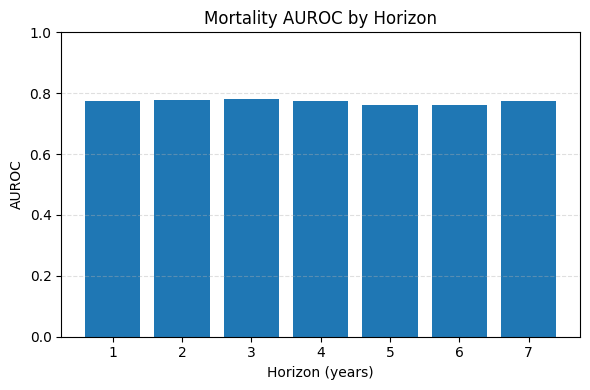

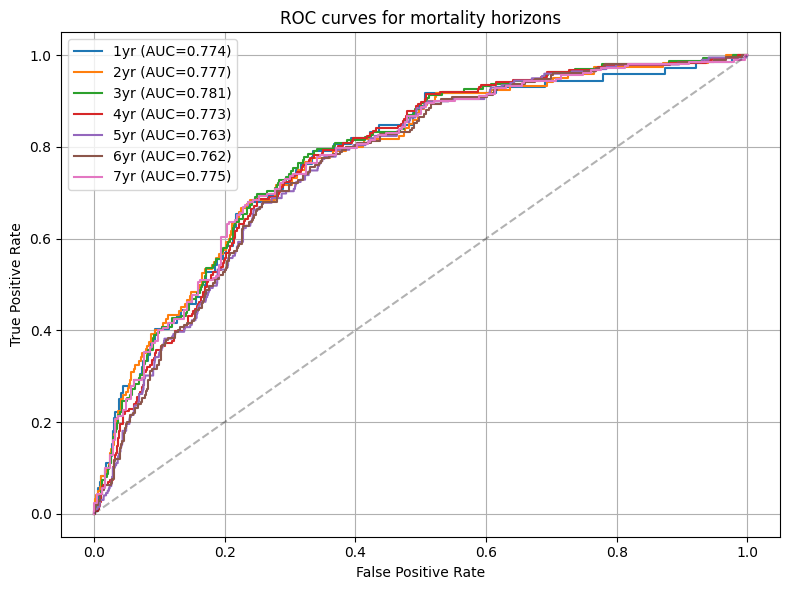

Saving validation predictions...


Saved predictions to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/val_mortality_preds_by_horizon.csv
Saved history to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/history.json
Done.


In [ ]:
#!/usr/bin/env python3
"""
Conformer + Extended Fusion (age + is_male + diagnoses + normal_ecg)
Full training script for multi-horizon mortality prediction (1-7 years).
"""

import os
import time
import json
import h5py
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqtnb
from tqdm import tqdm as tqd
import multiprocessing
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from contextlib import contextmanager

# ------------------------
# USER CONFIG - change these
# ------------------------
#HDF5_ROOT = r"D:\Semester-4\15 Credit project work\Download\extracted_Dataset"
#CSV_PATH  = r"D:\Semester-4\15 Credit project work\Download\exams.csv"
#SAVE_DIR  = r"D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality"
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

HDF5_ROOT = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"
CSV_PATH = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
SAVE_DIR = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality"
os.makedirs(SAVE_DIR, exist_ok=True)

# Model / training hyperparams
BATCH_SIZE = 256
EPOCHS = 10
LR = 1e-3
ACCUM = 1                # gradient accumulation steps (not used but kept)
DIAGNOSIS_COLS = ["1dAVb","RBBB","LBBB","SB","ST","AF"]
HORIZONS = [1,2,3,4,5,6,7]   # years to evaluate
SEED = 42

# ------------------------
# Environment / device / AMP
# ------------------------
torch.manual_seed(SEED)
np.random.seed(SEED)

USE_GPU = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_GPU else "cpu")
print("Device:", DEVICE, "| GPU available:", USE_GPU)

# ================================
# UNIVERSAL AMP IMPORT (WORKS CPU/GPU)
# ================================
try:
    from torch.cuda.amp import GradScaler, autocast
    print("Using torch.cuda.amp (AMP available)")
except Exception:
    print("AMP NOT available, using dummy GradScaler/autocast")

    class GradScaler:
        def __init__(self, enabled=False): pass
        def scale(self, loss): return loss
        def step(self, optimizer): optimizer.step()
        def update(self): pass

    @contextmanager
    def autocast(enabled=False):
        yield

#scaler = GradScaler(enabled=USE_GPU)
scaler = torch.amp.GradScaler("cuda", enabled=USE_GPU)

# Provide a safe autocast context manager for CPU/GPU
if USE_GPU:
    @contextmanager
    def autocast_ctx():
        #with autocast(device_type="cuda", enabled=True):
        with torch.amp.autocast("cuda", enabled=True):

            yield
else:
    @contextmanager
    def autocast_ctx():
        yield

# ------------------------
# Helper: pick tqdm variant
# ------------------------
def get_tqdm():
    try:
        # prefer notebook tqdm if running in a notebook
        return tqtnb
    except Exception:
        return tqd

TQDM = get_tqdm()

# ------------------------
# Utility: choose num_workers safely
# ------------------------
def recommended_num_workers():
    cpu = multiprocessing.cpu_count()
    # If on Windows/Jupyter use 0 or 1 for safety
    if os.name == "nt":
        return 0
    # typical safe value: min(2, cpu-1)
    return max(0, min(2, cpu - 1))

NUM_WORKERS = recommended_num_workers()
print("num_workers chosen:", NUM_WORKERS)

# ------------------------
# Load CSV and check time column
# ------------------------
print("Loading CSV:", CSV_PATH)
df = pd.read_csv(CSV_PATH, low_memory=False)
df["exam_id"] = df["exam_id"].astype(str)

# check for a time column: prefer 'timey' (years), else 'time_days' or 'followup_days'
if "timey" not in df.columns:
    if "time_days" in df.columns:
        print("Converting time_days -> timey (years)")
        df["timey"] = df["time_days"].astype(float) / 365.25
    elif "followup_days" in df.columns:
        print("Converting followup_days -> timey (years)")
        df["timey"] = df["followup_days"].astype(float) / 365.25
    else:
        # If no time column present, we'll error out later — but set a placeholder
        print("Warning: no 'timey' or 'time_days' found. You must provide follow-up time; using zeros as placeholder.")
        df["timey"] = 0.0

# Ensure numeric columns exist and convert
# include is_male for sex
for col in DIAGNOSIS_COLS + ["normal_ecg", "age", "death", "timey", "is_male"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # create column of zeros if missing (diagnosis missing -> zeros)
        default = 0.0
        if col == "age":
            default = 0.0
        df[col] = default

# Drop rows with missing critical values
initial_rows = len(df)
df = df.dropna(subset=["death", "timey"] + DIAGNOSIS_COLS + ["normal_ecg", "age", "is_male"])
print(f"Rows before cleaning: {initial_rows}, after dropna: {len(df)}")

# ------------------------
# Build HDF5 index (pre-index exams in parts 0/1)
# ------------------------
print("Indexing HDF5 files under:", HDF5_ROOT)
hdf5_index = {}
for part in [0,1]:
    h5_path = f"{HDF5_ROOT}/exams_part{part}/exams_part{part}.hdf5"
    if not os.path.exists(h5_path):
        print("Warning: HDF5 not found:", h5_path)
        continue
    with h5py.File(h5_path, "r") as f:
        ids = f["exam_id"][:].astype(str)
        for i, eid in enumerate(ids):
            hdf5_index[eid] = (part, i)
print("Indexed HDF5 exam ids:", len(hdf5_index))

# Map part indices into df, drop rows not in HDF5
df["part"] = df["exam_id"].map(lambda x: hdf5_index.get(x, (np.nan, np.nan))[0])
df["h5pos"] = df["exam_id"].map(lambda x: hdf5_index.get(x, (np.nan, np.nan))[1])
df = df.dropna(subset=["part", "h5pos"])
df["part"] = df["part"].astype(int)
df["h5pos"] = df["h5pos"].astype(int)
print("Rows after mapping to HDF5:", len(df))

# ------------------------
# Train / val split
# ------------------------
print("Splitting train/val (stratify on death)...")
train_df, val_df = train_test_split(df, test_size=0.2, random_state=SEED, stratify=df["death"])
print("Train:", len(train_df), "Val:", len(val_df))

# Save small info
pd.DataFrame({"n_train":[len(train_df)], "n_val":[len(val_df)]}).to_csv(os.path.join(SAVE_DIR,"split_info.csv"), index=False)

# ------------------------
# Dataset (uses pre-indexed pos & part)
# ------------------------
class ECGDatasetSurvival(Dataset):
    def __init__(self, df, hdf5_root, diag_cols, horizons=HORIZONS):
        self.df = df.reset_index(drop=True).copy()
        self.root = hdf5_root
        self.diag_cols = diag_cols
        self.horizons = horizons

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        part = int(row.part)
        pos = int(row.h5pos)
        h5_path = f"{self.root}/exams_part{part}/exams_part{part}.hdf5"
        with h5py.File(h5_path, "r") as f:
            ecg = f["tracings"][pos].astype(np.float32)
        # Ensure shape (12, L)
        if ecg.shape[0] != 12:
            ecg = ecg.T
        ecg = torch.tensor(ecg, dtype=torch.float32)   # (12, L)
        # scalars
        death = float(row.death)
        timey = float(row.timey)
        labels_diag = torch.tensor([float(row[c]) for c in self.diag_cols], dtype=torch.float32)
        age = float(row.age)
        is_male = float(row.is_male)
        normal = float(row.normal_ecg)
        return {
            "ecg": ecg,
            "death": torch.tensor([death], dtype=torch.float32),
            "timey": torch.tensor([timey], dtype=torch.float32),
            "labels": labels_diag,
            "age": torch.tensor([age], dtype=torch.float32),
            "is_male": torch.tensor([is_male], dtype=torch.float32),
            "normal": torch.tensor([normal], dtype=torch.float32),
            "exam_id": str(row.exam_id),
            "patient_id": row.get("patient_id", None)
        }

def collate_surv(batch):
    return {
        "ecg": torch.stack([b["ecg"] for b in batch]),
        "death": torch.stack([b["death"] for b in batch]),
        "timey": torch.stack([b["timey"] for b in batch]),
        "labels": torch.stack([b["labels"] for b in batch]),
        "age": torch.stack([b["age"] for b in batch]),
        "is_male": torch.stack([b["is_male"] for b in batch]),
        "normal": torch.stack([b["normal"] for b in batch]),
        "exam_id": [b["exam_id"] for b in batch],
        "patient_id": [b["patient_id"] for b in batch],
    }

# ------------------------
# Model: Lite Conformer with Fusion (ECG + age + is_male + diag + normal)
# ------------------------
class LiteConformerBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.ff = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim*2),
            nn.ReLU(),
            nn.Linear(dim*2, dim)
        )
        self.attn = nn.MultiheadAttention(dim, num_heads=2, batch_first=True)
        self.conv = nn.Sequential(
            nn.Conv1d(dim, dim, kernel_size=15, padding=7, groups=dim),
            nn.ReLU(),
            nn.Conv1d(dim, dim, kernel_size=1)
        )
        self.norm = nn.LayerNorm(dim)

    def forward(self, x):
        x = x + self.ff(x)
        x = x + self.attn(x, x, x)[0]
        xc = self.conv(x.transpose(1,2)).transpose(1,2)
        return self.norm(x + xc)

class ConformerECG_Fusion(nn.Module):
    def __init__(self, d_model=64, num_diag=len(DIAGNOSIS_COLS), n_horizons=len(HORIZONS)):
        super().__init__()

        # ECG encoder
        self.down = nn.Conv1d(12, 12, kernel_size=4, stride=4)
        self.proj = nn.Conv1d(12, d_model, kernel_size=1)
        self.blocks = nn.ModuleList([LiteConformerBlock(d_model) for _ in range(2)])
        self.pool = nn.AdaptiveAvgPool1d(1)

        # Patient Fusion MLP
        # age(1) + is_male(1) + diagnoses(6) + normal(1) = 9 features
        fusion_in = 9
        self.fusion = nn.Sequential(
            nn.Linear(fusion_in, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU()
        )

        # Final heads
        self.death = nn.Linear(d_model + 32, n_horizons)
        self.diagnosis = nn.Linear(d_model + 32, num_diag)
        self.age = nn.Linear(d_model + 32, 1)
        self.normal = nn.Linear(d_model + 32, 1)

    def forward(self, x, age, is_male, diag, normal):
        """
        x: ECG tensor (B, 12, L)
        age: (B,1)
        is_male: (B,1)
        diag: (B,6)
        normal: (B,1)
        """

        # ECG feature extraction
        x = self.down(x)            # (B,12,L/4)
        x = self.proj(x)            # (B,d_model,L/4)
        x = x.transpose(1, 2)       # (B,L, d_model)
        for blk in self.blocks:
            x = blk(x)
        x = x.transpose(1, 2)       # (B, d_model, L)
        x = self.pool(x).squeeze(-1)  # (B, d_model)

        # Patient fusion
        patient = torch.cat([age, is_male, diag, normal], dim=1)  # (B,9)
        patient_feat = self.fusion(patient)                      # (B,32)

        # Combine ECG + patient
        z = torch.cat([x, patient_feat], dim=1)  # (B, d_model+32)

        # Heads
        return {
            "death": self.death(z),
            "diagnosis": self.diagnosis(z),
            "age": self.age(z),
            "normal": self.normal(z)
        }

# ------------------------
# Multi-horizon masked BCE loss and other losses
# ------------------------
bce_logits = nn.BCEWithLogitsLoss(reduction="none")
mse_loss_fn = nn.MSELoss()

def death_horizon_loss(logits, timey, event, horizons=HORIZONS):
    """
    logits: (B,H), timey/event: (B,1)
    returns: (loss scalar, labels_np (B,H), mask_np (B,H) bool)
    """
    B, H = logits.shape
    device = logits.device
    timey = timey.squeeze(1)
    event = event.squeeze(1)
    labels = torch.zeros((B,H), device=device)
    mask = torch.zeros((B,H), device=device)
    for i,k in enumerate(horizons):
        valid = (event == 1) | (timey >= float(k))
        mask[:, i] = valid.float()
        label_pos = (event == 1) & (timey <= float(k))
        labels[:, i] = label_pos.float()
    loss_mat = bce_logits(logits, labels)
    masked_sum = (loss_mat * mask).sum()
    denom = mask.sum().clamp_min(1.0)
    loss = masked_sum / denom
    return loss, labels.detach().cpu().numpy(), mask.detach().cpu().numpy().astype(bool)

# ------------------------
# Build datasets & loaders
# ------------------------
print("Preparing datasets and loaders...")
train_ds = ECGDatasetSurvival(train_df, HDF5_ROOT, DIAGNOSIS_COLS, horizons=HORIZONS)
val_ds   = ECGDatasetSurvival(val_df,   HDF5_ROOT, DIAGNOSIS_COLS, horizons=HORIZONS)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, collate_fn=collate_surv)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, collate_fn=collate_surv)

print("Train batches:", len(train_loader), "Val batches:", len(val_loader))

# ------------------------
# Instantiate model, optimizer, scheduler
# ------------------------
model = ConformerECG_Fusion().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)

# ------------------------
# Training loop with tqdm + AMP if GPU
# ------------------------
best_val7 = -np.inf
history = {"train_loss": [], "val_loss": [], "aucs": []}

PROG = TQDM

print("\n=== TRAINING START ===")
for epoch in range(1, EPOCHS+1):
    model.train()
    running = 0.0
    it = 0
    train_bar = PROG(train_loader, desc=f"Epoch {epoch}/{EPOCHS} Train", leave=False)
    for batch in train_bar:
        x = batch["ecg"].to(DEVICE)
        timey = batch["timey"].to(DEVICE)
        event = batch["death"].to(DEVICE)
        labels_diag = batch["labels"].to(DEVICE)
        age = batch["age"].to(DEVICE)
        is_male = batch["is_male"].to(DEVICE)
        normal = batch["normal"].to(DEVICE)

        with autocast_ctx():
            out = model(x, age, is_male, labels_diag, normal)
            death_logits = out["death"]
            diag_logits = out["diagnosis"]
            age_pred = out["age"]
            normal_pred = out["normal"]

            death_loss, _, _ = death_horizon_loss(death_logits, timey, event, horizons=HORIZONS)
            diag_loss = bce_logits(diag_logits, labels_diag).mean()
            age_loss = mse_loss_fn(age_pred, age)
            normal_loss = bce_logits(normal_pred, normal).mean()

            loss = death_loss + diag_loss + 0.1*age_loss + normal_loss
            loss_val = loss.item()

        optimizer.zero_grad()
        if USE_GPU:
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            optimizer.step()

        running += loss_val
        it += 1
        if it % 10 == 0:
            train_bar.set_postfix(loss=f"{running/it:.4f}")

    avg_train_loss = running / max(1, it)
    history["train_loss"].append(avg_train_loss)
    print(f"Epoch {epoch} Train Loss: {avg_train_loss:.4f}")

    # -------------------------
    # Validation
    # -------------------------
    model.eval()
    val_running = 0.0
    all_preds = {k: [] for k in HORIZONS}
    all_labels = {k: [] for k in HORIZONS}

    val_bar = PROG(val_loader, desc=f"Epoch {epoch}/{EPOCHS} Val", leave=False)
    with torch.no_grad():
        for batch in val_bar:
            x = batch["ecg"].to(DEVICE)
            timey = batch["timey"].to(DEVICE)
            event = batch["death"].to(DEVICE)
            labels_diag = batch["labels"].to(DEVICE)
            age = batch["age"].to(DEVICE)
            is_male = batch["is_male"].to(DEVICE)
            normal = batch["normal"].to(DEVICE)

            out = model(x, age, is_male, labels_diag, normal)
            death_logits = out["death"]
            diag_logits = out["diagnosis"]
            age_pred = out["age"]
            normal_pred = out["normal"]

            death_loss, labels_np, mask_np = death_horizon_loss(death_logits, timey, event, horizons=HORIZONS)
            diag_loss = bce_logits(diag_logits, labels_diag).mean()
            age_loss = mse_loss_fn(age_pred, age)
            normal_loss = bce_logits(normal_pred, normal).mean()

            val_running += (death_loss.item() + diag_loss.item() + 0.1*age_loss.item() + normal_loss.item())

            probs = torch.sigmoid(death_logits).cpu().numpy()   # (B,H)
            # labels_np, mask_np are np arrays
            for h_idx, k in enumerate(HORIZONS):
                mask_h = mask_np[:, h_idx]
                if mask_h.sum() == 0:
                    continue
                preds_h = probs[mask_h, h_idx]
                labs_h  = labels_np[mask_h, h_idx]
                all_preds[k].extend(preds_h.tolist())
                all_labels[k].extend(labs_h.tolist())

    avg_val_loss = val_running / max(1, len(val_loader))
    history["val_loss"].append(avg_val_loss)
    print(f"Epoch {epoch} Val Loss: {avg_val_loss:.4f}")

    # compute AUROCs per horizon
    aucs = {}
    for k in HORIZONS:
        y_true = np.array(all_labels[k])
        y_score = np.array(all_preds[k])
        if len(y_true) == 0 or len(np.unique(y_true)) < 2:
            aucs[k] = np.nan
        else:
            try:
                aucs[k] = roc_auc_score(y_true, y_score)
            except Exception:
                aucs[k] = np.nan
    history["aucs"].append(aucs)
    print("AUROCs:", {k: (f"{aucs[k]:.4f}" if not np.isnan(aucs[k]) else "nan") for k in HORIZONS})

    # save best by 5yr AUC
    val5 = aucs.get(5, np.nan)
    if not np.isnan(val5) and val5 > best_val5:
        best_val5 = val5
        best_path = os.path.join(SAVE_DIR, "best_model_5yr.pth")
        torch.save(model.state_dict(), best_path)
        print("Saved best model to", best_path)

    # scheduler step on val loss
    scheduler.step(avg_val_loss)

# ------------------------
# After training: plots and final metrics
# ------------------------
final_aucs = history["aucs"][-1] if len(history["aucs"])>0 else {}
years = HORIZONS
aucs_plot = [final_aucs.get(k, np.nan) for k in years]

plt.figure(figsize=(6,4))
plt.bar(years, [x if not np.isnan(x) else 0 for x in aucs_plot])
plt.ylim(0.0, 1.0)
plt.xlabel("Horizon (years)")
plt.ylabel("AUROC")
plt.title("Mortality AUROC by Horizon")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(years)
plt.tight_layout()
plt.show()

# ROC curves for available horizons (use last epoch's collected preds in loop variables)
plt.figure(figsize=(8,6))
plotted = 0
for k in HORIZONS:
    y_true = np.array(all_labels[k]) if 'all_labels' in locals() else np.array([])
    y_score = np.array(all_preds[k]) if 'all_preds' in locals() else np.array([])
    if len(y_true) == 0 or len(np.unique(y_true)) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr, label=f"{k}yr (AUC={roc_auc_score(y_true,y_score):.3f})")
    plotted += 1

if plotted > 0:
    plt.plot([0,1],[0,1],"k--", alpha=0.3)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curves for mortality horizons")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("No ROC curves to plot (not enough valid samples per horizon).")

# ------------------------
# Save predictions on validation set
# ------------------------
print("Saving validation predictions...")
pred_rows = []
model.eval()
with torch.no_grad():
    for batch in tqd(val_loader, desc="Save preds", leave=False):
        x = batch["ecg"].to(DEVICE)
        timey = batch["timey"].numpy().flatten()
        event = batch["death"].numpy().flatten()
        exam_ids = batch["exam_id"]
        age = batch["age"].to(DEVICE)
        is_male = batch["is_male"].to(DEVICE)
        diag = batch["labels"].to(DEVICE)
        normal = batch["normal"].to(DEVICE)
        out = model(x, age, is_male, diag, normal)
        probs = torch.sigmoid(out["death"]).cpu().numpy()
        for i, eid in enumerate(exam_ids):
            row = {"exam_id": eid, "death": int(event[i]), "timey": float(timey[i])}
            for h_idx, k in enumerate(HORIZONS):
                row[f"pred_p_{k}yr"] = float(probs[i, h_idx])
            pred_rows.append(row)

pred_df = pd.DataFrame(pred_rows)
pred_path = os.path.join(SAVE_DIR, "val_mortality_preds_by_horizon.csv")
pred_df.to_csv(pred_path, index=False)
print("Saved predictions to", pred_path)

# Save training history
with open(os.path.join(SAVE_DIR, "history.json"), "w") as f:
    json.dump(history, f, indent=2)
print("Saved history to", os.path.join(SAVE_DIR, "history.json"))

print("Done.")


In [ ]:
#!rm -rf /content/drive

from google.colab import drive
drive.mount('/content/drive')
#!pip install lifelines


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Device: cuda | GPU available: True
Using torch.cuda.amp (AMP available)
num_workers chosen: 2
Loading CSV: /content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv
Rows before cleaning: 345779, after dropna: 233647
Indexing HDF5 files under: /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams
Indexed HDF5 exam ids: 40001
Rows after mapping to HDF5: 28316
Splitting train/val (stratify on death)...
Train: 22652 Val: 5664

Fitting Cox PH baseline on train set...
Saved Cox summary to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/cox_train_summary.csv
Preparing datasets and loaders...
Train batches: 89 Val batches: 23

=== TRAINING START ===


Epoch 1/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 1 Train Loss: 149.3102


Epoch 1/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 1 Val Loss: 9.8837
AUROCs: {1: '0.2274', 2: '0.2243', 3: '0.2205', 4: '0.2279', 5: '0.2224', 6: '0.7694', 7: '0.7768'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 2/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 2 Train Loss: 2.5838


Epoch 2/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 2 Val Loss: 1.6398
AUROCs: {1: '0.2278', 2: '0.2234', 3: '0.2271', 4: '0.7773', 5: '0.6635', 6: '0.7668', 7: '0.7779'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 3/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 3 Train Loss: 1.1693


Epoch 3/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 3 Val Loss: 0.9642
AUROCs: {1: '0.2284', 2: '0.2246', 3: '0.7816', 4: '0.7716', 5: '0.7002', 6: '0.7644', 7: '0.7747'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 4/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 4 Train Loss: 0.9307


Epoch 4/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 4 Val Loss: 0.9195
AUROCs: {1: '0.2286', 2: '0.2308', 3: '0.7800', 4: '0.7711', 5: '0.7590', 6: '0.7627', 7: '0.7739'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 5/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 5 Train Loss: 0.9061


Epoch 5/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 5 Val Loss: 0.9088
AUROCs: {1: '0.2390', 2: '0.7404', 3: '0.7798', 4: '0.7703', 5: '0.7602', 6: '0.7616', 7: '0.7733'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 6/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 6 Train Loss: 0.8952


Epoch 6/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 6 Val Loss: 0.9008
AUROCs: {1: '0.7619', 2: '0.7741', 3: '0.7806', 4: '0.7720', 5: '0.7617', 6: '0.7621', 7: '0.7744'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 7/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 7 Train Loss: 0.8878


Epoch 7/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 7 Val Loss: 0.9006
AUROCs: {1: '0.7739', 2: '0.7757', 3: '0.7808', 4: '0.7725', 5: '0.7622', 6: '0.7622', 7: '0.7750'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 8/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 8 Train Loss: 0.8839


Epoch 8/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 8 Val Loss: 0.8879
AUROCs: {1: '0.7746', 2: '0.7764', 3: '0.7809', 4: '0.7725', 5: '0.7627', 6: '0.7621', 7: '0.7753'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 9/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 9 Train Loss: 0.8740


Epoch 9/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 9 Val Loss: 0.8795
AUROCs: {1: '0.7747', 2: '0.7766', 3: '0.7809', 4: '0.7726', 5: '0.7627', 6: '0.7620', 7: '0.7751'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_5yr.pth


Epoch 10/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 10 Train Loss: 0.8670


Epoch 10/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 10 Val Loss: 0.8817
AUROCs: {1: '0.7743', 2: '0.7769', 3: '0.7810', 4: '0.7729', 5: '0.7627', 6: '0.7618', 7: '0.7746'}


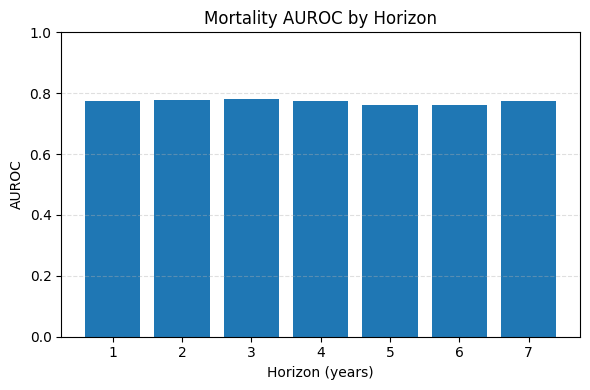

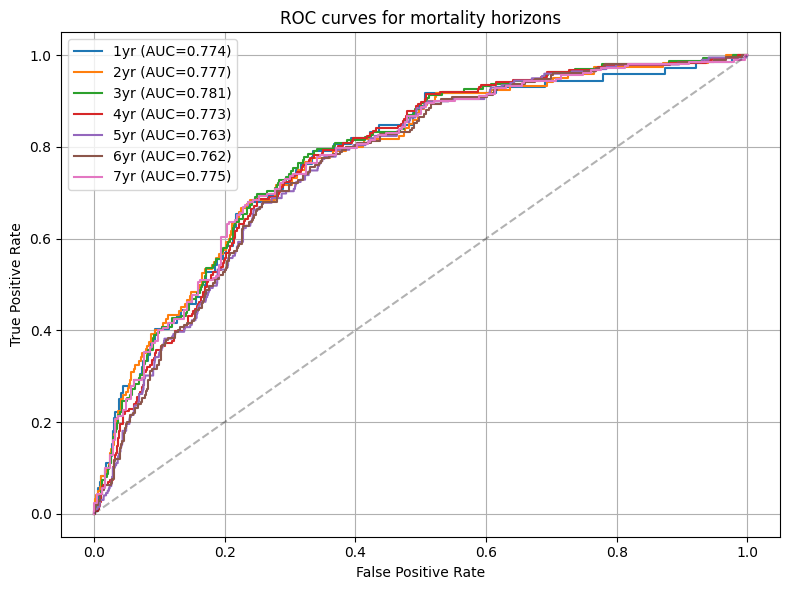

Saving validation predictions...


Saved predictions to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/val_mortality_preds_by_horizon.csv

Running Kaplan–Meier plots, Cox evaluation, and comparison...
Saved: km_val_overall.png
Saved: km_val_by_sex.png


/tmp/ipython-input-3012943224.py:642: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_df in val_surv_df.groupby("age_group"):


Saved: km_val_by_age_groups.png

Cox (trained on train set) summary (first few rows):
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
age        0.061356   1.063277  0.002464        0.056527        0.066184   
is_male    0.472899   1.604639  0.068761        0.338130        0.607669   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to          z  \
covariate                                                                
age                   1.058155             1.068424     0.0  24.903583   
is_male               1.402322             1.836146     0.0   6.877410   

                       p    -log2(p)  
covariate                             
age        6.804131e-137  452.337738  
is_male     6.095063e-12   37.255496  
Saved Cox summary to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/cox_train_summary_used_for_eval.csv
Could not 

In [ ]:
#!/usr/bin/env python3
"""
Conformer + Extended Fusion (age + is_male + diagnoses + normal_ecg)
Full training script for multi-horizon mortality prediction (1-7 years).
Kaplan-Meier / Cox model with sex and age  (and get harzard ratio) and other predictions
"""

import os
import time
import json
import h5py
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqtnb
from tqdm import tqdm as tqd
import multiprocessing
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from contextlib import contextmanager
# survival analysis libs (install lifelines if needed: pip install lifelines)
from lifelines import KaplanMeierFitter, CoxPHFitter

# ------------------------
# USER CONFIG - change these
# ------------------------
#HDF5_ROOT = r"D:\Semester-4\15 Credit project work\Download\extracted_Dataset"
#CSV_PATH  = r"D:\Semester-4\15 Credit project work\Download\exams.csv"
#SAVE_DIR  = r"D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality"
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

HDF5_ROOT = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"
CSV_PATH = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
SAVE_DIR = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality"
os.makedirs(SAVE_DIR, exist_ok=True)

# Model / training hyperparams
BATCH_SIZE = 256
EPOCHS = 10
LR = 1e-3
ACCUM = 1                # gradient accumulation steps (not used but kept)
DIAGNOSIS_COLS = ["1dAVb","RBBB","LBBB","SB","ST","AF"]
HORIZONS = [1,2,3,4,5,6,7]   # years to evaluate
SEED = 42

# ------------------------
# Environment / device / AMP
# ------------------------
torch.manual_seed(SEED)
np.random.seed(SEED)

USE_GPU = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_GPU else "cpu")
print("Device:", DEVICE, "| GPU available:", USE_GPU)

# ================================
# UNIVERSAL AMP IMPORT (WORKS CPU/GPU)
# ================================
try:
    from torch.cuda.amp import GradScaler, autocast
    print("Using torch.cuda.amp (AMP available)")
except Exception:
    print("AMP NOT available, using dummy GradScaler/autocast")

    class GradScaler:
        def __init__(self, enabled=False): pass
        def scale(self, loss): return loss
        def step(self, optimizer): optimizer.step()
        def update(self): pass

    @contextmanager
    def autocast(enabled=False):
        yield

#scaler = GradScaler(enabled=USE_GPU)
scaler = torch.amp.GradScaler("cuda", enabled=USE_GPU)

# Provide a safe autocast context manager for CPU/GPU
if USE_GPU:
    @contextmanager
    def autocast_ctx():
        #with autocast(device_type="cuda", enabled=True):
        with torch.amp.autocast("cuda", enabled=True):

            yield
else:
    @contextmanager
    def autocast_ctx():
        yield

# ------------------------
# Helper: pick tqdm variant
# ------------------------
def get_tqdm():
    try:
        # prefer notebook tqdm if running in a notebook
        return tqtnb
    except Exception:
        return tqd

TQDM = get_tqdm()

# ------------------------
# Utility: choose num_workers safely
# ------------------------
def recommended_num_workers():
    cpu = multiprocessing.cpu_count()
    # If on Windows/Jupyter use 0 or 1 for safety
    if os.name == "nt":
        return 0
    # typical safe value: min(2, cpu-1)
    return max(0, min(2, cpu - 1))

NUM_WORKERS = recommended_num_workers()
print("num_workers chosen:", NUM_WORKERS)

# ------------------------
# Load CSV and check time column
# ------------------------
print("Loading CSV:", CSV_PATH)
df = pd.read_csv(CSV_PATH, low_memory=False)
df["exam_id"] = df["exam_id"].astype(str)

# check for a time column: prefer 'timey' (years), else 'time_days' or 'followup_days'
if "timey" not in df.columns:
    if "time_days" in df.columns:
        print("Converting time_days -> timey (years)")
        df["timey"] = df["time_days"].astype(float) / 365.25
    elif "followup_days" in df.columns:
        print("Converting followup_days -> timey (years)")
        df["timey"] = df["followup_days"].astype(float) / 365.25
    else:
        # If no time column present, we'll error out later — but set a placeholder
        print("Warning: no 'timey' or 'time_days' found. You must provide follow-up time; using zeros as placeholder.")
        df["timey"] = 0.0

# Ensure numeric columns exist and convert
# include is_male for sex
for col in DIAGNOSIS_COLS + ["normal_ecg", "age", "death", "timey", "is_male"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # create column of zeros if missing (diagnosis missing -> zeros)
        default = 0.0
        if col == "age":
            default = 0.0
        df[col] = default

# Drop rows with missing critical values
initial_rows = len(df)
df = df.dropna(subset=["death", "timey"] + DIAGNOSIS_COLS + ["normal_ecg", "age", "is_male"])
print(f"Rows before cleaning: {initial_rows}, after dropna: {len(df)}")

# ------------------------
# Build HDF5 index (pre-index exams in parts 0/1)
# ------------------------
print("Indexing HDF5 files under:", HDF5_ROOT)
hdf5_index = {}
for part in [0,1]:
    h5_path = f"{HDF5_ROOT}/exams_part{part}/exams_part{part}.hdf5"
    if not os.path.exists(h5_path):
        print("Warning: HDF5 not found:", h5_path)
        continue
    with h5py.File(h5_path, "r") as f:
        ids = f["exam_id"][:].astype(str)
        for i, eid in enumerate(ids):
            hdf5_index[eid] = (part, i)
print("Indexed HDF5 exam ids:", len(hdf5_index))

# Map part indices into df, drop rows not in HDF5
df["part"] = df["exam_id"].map(lambda x: hdf5_index.get(x, (np.nan, np.nan))[0])
df["h5pos"] = df["exam_id"].map(lambda x: hdf5_index.get(x, (np.nan, np.nan))[1])
df = df.dropna(subset=["part", "h5pos"])
df["part"] = df["part"].astype(int)
df["h5pos"] = df["h5pos"].astype(int)
print("Rows after mapping to HDF5:", len(df))

# ------------------------
# Train / val split
# ------------------------
print("Splitting train/val (stratify on death)...")
train_df, val_df = train_test_split(df, test_size=0.2, random_state=SEED, stratify=df["death"])
print("Train:", len(train_df), "Val:", len(val_df))

# ------------------------
# Fit Cox proportional hazards on the training set (baseline)
# ------------------------
print("\nFitting Cox PH baseline on train set...")
cox = CoxPHFitter()
# Ensure the necessary columns exist on train_df
cox_train_df = train_df[["timey", "death", "age", "is_male"]].copy()
# drop rows with missing (shouldn't be many since you cleaned earlier)
cox_train_df = cox_train_df.dropna(subset=["timey", "death", "age", "is_male"])
cox.fit(cox_train_df, duration_col="timey", event_col="death")
# save summary
cox.summary.to_csv(os.path.join(SAVE_DIR, "cox_train_summary.csv"))
print("Saved Cox summary to", os.path.join(SAVE_DIR, "cox_train_summary.csv"))
# keep cox object for later prediction on val set


# Save small info
pd.DataFrame({"n_train":[len(train_df)], "n_val":[len(val_df)]}).to_csv(os.path.join(SAVE_DIR,"split_info.csv"), index=False)

# ------------------------
# Dataset (uses pre-indexed pos & part)
# ------------------------
class ECGDatasetSurvival(Dataset):
    def __init__(self, df, hdf5_root, diag_cols, horizons=HORIZONS):
        self.df = df.reset_index(drop=True).copy()
        self.root = hdf5_root
        self.diag_cols = diag_cols
        self.horizons = horizons

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        part = int(row.part)
        pos = int(row.h5pos)
        h5_path = f"{self.root}/exams_part{part}/exams_part{part}.hdf5"
        with h5py.File(h5_path, "r") as f:
            ecg = f["tracings"][pos].astype(np.float32)
        # Ensure shape (12, L)
        if ecg.shape[0] != 12:
            ecg = ecg.T
        ecg = torch.tensor(ecg, dtype=torch.float32)   # (12, L)
        # scalars
        death = float(row.death)
        timey = float(row.timey)
        labels_diag = torch.tensor([float(row[c]) for c in self.diag_cols], dtype=torch.float32)
        age = float(row.age)
        is_male = float(row.is_male)
        normal = float(row.normal_ecg)
        return {
            "ecg": ecg,
            "death": torch.tensor([death], dtype=torch.float32),
            "timey": torch.tensor([timey], dtype=torch.float32),
            "labels": labels_diag,
            "age": torch.tensor([age], dtype=torch.float32),
            "is_male": torch.tensor([is_male], dtype=torch.float32),
            "normal": torch.tensor([normal], dtype=torch.float32),
            "exam_id": str(row.exam_id),
            "patient_id": row.get("patient_id", None)
        }

def collate_surv(batch):
    return {
        "ecg": torch.stack([b["ecg"] for b in batch]),
        "death": torch.stack([b["death"] for b in batch]),
        "timey": torch.stack([b["timey"] for b in batch]),
        "labels": torch.stack([b["labels"] for b in batch]),
        "age": torch.stack([b["age"] for b in batch]),
        "is_male": torch.stack([b["is_male"] for b in batch]),
        "normal": torch.stack([b["normal"] for b in batch]),
        "exam_id": [b["exam_id"] for b in batch],
        "patient_id": [b["patient_id"] for b in batch],
    }

# ------------------------
# Model: Lite Conformer with Fusion (ECG + age + is_male + diag + normal)
# ------------------------
class LiteConformerBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.ff = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim*2),
            nn.ReLU(),
            nn.Linear(dim*2, dim)
        )
        self.attn = nn.MultiheadAttention(dim, num_heads=2, batch_first=True)
        self.conv = nn.Sequential(
            nn.Conv1d(dim, dim, kernel_size=15, padding=7, groups=dim),
            nn.ReLU(),
            nn.Conv1d(dim, dim, kernel_size=1)
        )
        self.norm = nn.LayerNorm(dim)

    def forward(self, x):
        x = x + self.ff(x)
        x = x + self.attn(x, x, x)[0]
        xc = self.conv(x.transpose(1,2)).transpose(1,2)
        return self.norm(x + xc)

class ConformerECG_Fusion(nn.Module):
    def __init__(self, d_model=64, num_diag=len(DIAGNOSIS_COLS), n_horizons=len(HORIZONS)):
        super().__init__()

        # ECG encoder
        self.down = nn.Conv1d(12, 12, kernel_size=4, stride=4)
        self.proj = nn.Conv1d(12, d_model, kernel_size=1)
        self.blocks = nn.ModuleList([LiteConformerBlock(d_model) for _ in range(2)])
        self.pool = nn.AdaptiveAvgPool1d(1)

        # Patient Fusion MLP
        # age(1) + is_male(1) + diagnoses(6) + normal(1) = 9 features
        fusion_in = 9
        self.fusion = nn.Sequential(
            nn.Linear(fusion_in, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU()
        )

        # Final heads
        self.death = nn.Linear(d_model + 32, n_horizons)
        self.diagnosis = nn.Linear(d_model + 32, num_diag)
        self.age = nn.Linear(d_model + 32, 1)
        self.normal = nn.Linear(d_model + 32, 1)

    def forward(self, x, age, is_male, diag, normal):
        """
        x: ECG tensor (B, 12, L)
        age: (B,1)
        is_male: (B,1)
        diag: (B,6)
        normal: (B,1)
        """

        # ECG feature extraction
        x = self.down(x)            # (B,12,L/4)
        x = self.proj(x)            # (B,d_model,L/4)
        x = x.transpose(1, 2)       # (B,L, d_model)
        for blk in self.blocks:
            x = blk(x)
        x = x.transpose(1, 2)       # (B, d_model, L)
        x = self.pool(x).squeeze(-1)  # (B, d_model)

        # Patient fusion
        patient = torch.cat([age, is_male, diag, normal], dim=1)  # (B,9)
        patient_feat = self.fusion(patient)                      # (B,32)

        # Combine ECG + patient
        z = torch.cat([x, patient_feat], dim=1)  # (B, d_model+32)

        # Heads
        return {
            "death": self.death(z),
            "diagnosis": self.diagnosis(z),
            "age": self.age(z),
            "normal": self.normal(z)
        }

# ------------------------
# Multi-horizon masked BCE loss and other losses
# ------------------------
bce_logits = nn.BCEWithLogitsLoss(reduction="none")
mse_loss_fn = nn.MSELoss()

def death_horizon_loss(logits, timey, event, horizons=HORIZONS):
    """
    logits: (B,H), timey/event: (B,1)
    returns: (loss scalar, labels_np (B,H), mask_np (B,H) bool)
    """
    B, H = logits.shape
    device = logits.device
    timey = timey.squeeze(1)
    event = event.squeeze(1)
    labels = torch.zeros((B,H), device=device)
    mask = torch.zeros((B,H), device=device)
    for i,k in enumerate(horizons):
        valid = (event == 1) | (timey >= float(k))
        mask[:, i] = valid.float()
        label_pos = (event == 1) & (timey <= float(k))
        labels[:, i] = label_pos.float()
    loss_mat = bce_logits(logits, labels)
    masked_sum = (loss_mat * mask).sum()
    denom = mask.sum().clamp_min(1.0)
    loss = masked_sum / denom
    return loss, labels.detach().cpu().numpy(), mask.detach().cpu().numpy().astype(bool)

# ------------------------
# Build datasets & loaders
# ------------------------
print("Preparing datasets and loaders...")
train_ds = ECGDatasetSurvival(train_df, HDF5_ROOT, DIAGNOSIS_COLS, horizons=HORIZONS)
val_ds   = ECGDatasetSurvival(val_df,   HDF5_ROOT, DIAGNOSIS_COLS, horizons=HORIZONS)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, collate_fn=collate_surv)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, collate_fn=collate_surv)

print("Train batches:", len(train_loader), "Val batches:", len(val_loader))

# ------------------------
# Instantiate model, optimizer, scheduler
# ------------------------
model = ConformerECG_Fusion().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)

# ------------------------
# Training loop with tqdm + AMP if GPU
# ------------------------
best_val7 = -np.inf
history = {"train_loss": [], "val_loss": [], "aucs": []}

PROG = TQDM

print("\n=== TRAINING START ===")
for epoch in range(1, EPOCHS+1):
    model.train()
    running = 0.0
    it = 0
    train_bar = PROG(train_loader, desc=f"Epoch {epoch}/{EPOCHS} Train", leave=False)
    for batch in train_bar:
        x = batch["ecg"].to(DEVICE)
        timey = batch["timey"].to(DEVICE)
        event = batch["death"].to(DEVICE)
        labels_diag = batch["labels"].to(DEVICE)
        age = batch["age"].to(DEVICE)
        is_male = batch["is_male"].to(DEVICE)
        normal = batch["normal"].to(DEVICE)

        with autocast_ctx():
            out = model(x, age, is_male, labels_diag, normal)
            death_logits = out["death"]
            diag_logits = out["diagnosis"]
            age_pred = out["age"]
            normal_pred = out["normal"]

            death_loss, _, _ = death_horizon_loss(death_logits, timey, event, horizons=HORIZONS)
            diag_loss = bce_logits(diag_logits, labels_diag).mean()
            age_loss = mse_loss_fn(age_pred, age)
            normal_loss = bce_logits(normal_pred, normal).mean()

            loss = death_loss + diag_loss + 0.1*age_loss + normal_loss
            loss_val = loss.item()

        optimizer.zero_grad()
        if USE_GPU:
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            optimizer.step()

        running += loss_val
        it += 1
        if it % 10 == 0:
            train_bar.set_postfix(loss=f"{running/it:.4f}")

    avg_train_loss = running / max(1, it)
    history["train_loss"].append(avg_train_loss)
    print(f"Epoch {epoch} Train Loss: {avg_train_loss:.4f}")

    # -------------------------
    # Validation
    # -------------------------
    model.eval()
    val_running = 0.0
    all_preds = {k: [] for k in HORIZONS}
    all_labels = {k: [] for k in HORIZONS}

    val_bar = PROG(val_loader, desc=f"Epoch {epoch}/{EPOCHS} Val", leave=False)
    with torch.no_grad():
        for batch in val_bar:
            x = batch["ecg"].to(DEVICE)
            timey = batch["timey"].to(DEVICE)
            event = batch["death"].to(DEVICE)
            labels_diag = batch["labels"].to(DEVICE)
            age = batch["age"].to(DEVICE)
            is_male = batch["is_male"].to(DEVICE)
            normal = batch["normal"].to(DEVICE)

            out = model(x, age, is_male, labels_diag, normal)
            death_logits = out["death"]
            diag_logits = out["diagnosis"]
            age_pred = out["age"]
            normal_pred = out["normal"]

            death_loss, labels_np, mask_np = death_horizon_loss(death_logits, timey, event, horizons=HORIZONS)
            diag_loss = bce_logits(diag_logits, labels_diag).mean()
            age_loss = mse_loss_fn(age_pred, age)
            normal_loss = bce_logits(normal_pred, normal).mean()

            val_running += (death_loss.item() + diag_loss.item() + 0.1*age_loss.item() + normal_loss.item())

            probs = torch.sigmoid(death_logits).cpu().numpy()   # (B,H)
            # labels_np, mask_np are np arrays
            for h_idx, k in enumerate(HORIZONS):
                mask_h = mask_np[:, h_idx]
                if mask_h.sum() == 0:
                    continue
                preds_h = probs[mask_h, h_idx]
                labs_h  = labels_np[mask_h, h_idx]
                all_preds[k].extend(preds_h.tolist())
                all_labels[k].extend(labs_h.tolist())

    avg_val_loss = val_running / max(1, len(val_loader))
    history["val_loss"].append(avg_val_loss)
    print(f"Epoch {epoch} Val Loss: {avg_val_loss:.4f}")

    # compute AUROCs per horizon
    aucs = {}
    for k in HORIZONS:
        y_true = np.array(all_labels[k])
        y_score = np.array(all_preds[k])
        if len(y_true) == 0 or len(np.unique(y_true)) < 2:
            aucs[k] = np.nan
        else:
            try:
                aucs[k] = roc_auc_score(y_true, y_score)
            except Exception:
                aucs[k] = np.nan
    history["aucs"].append(aucs)
    print("AUROCs:", {k: (f"{aucs[k]:.4f}" if not np.isnan(aucs[k]) else "nan") for k in HORIZONS})

    # save best by 7yr AUC
    val7 = aucs.get(7, np.nan)
    if not np.isnan(val7) and val7 > best_val7:
        best_val7 = val7
        best_path = os.path.join(SAVE_DIR, "best_model_7yr.pth")
        torch.save(model.state_dict(), best_path)
        print("Saved best model to", best_path)

    # scheduler step on val loss
    scheduler.step(avg_val_loss)

# ------------------------
# After training: plots and final metrics
# ------------------------
final_aucs = history["aucs"][-1] if len(history["aucs"])>0 else {}
years = HORIZONS
aucs_plot = [final_aucs.get(k, np.nan) for k in years]

plt.figure(figsize=(6,4))
plt.bar(years, [x if not np.isnan(x) else 0 for x in aucs_plot])
plt.ylim(0.0, 1.0)
plt.xlabel("Horizon (years)")
plt.ylabel("AUROC")
plt.title("Mortality AUROC by Horizon")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(years)
plt.tight_layout()
plt.show()

# ROC curves for available horizons (use last epoch's collected preds in loop variables)
plt.figure(figsize=(8,6))
plotted = 0
for k in HORIZONS:
    y_true = np.array(all_labels[k]) if 'all_labels' in locals() else np.array([])
    y_score = np.array(all_preds[k]) if 'all_preds' in locals() else np.array([])
    if len(y_true) == 0 or len(np.unique(y_true)) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr, label=f"{k}yr (AUC={roc_auc_score(y_true,y_score):.3f})")
    plotted += 1

if plotted > 0:
    plt.plot([0,1],[0,1],"k--", alpha=0.3)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curves for mortality horizons")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("No ROC curves to plot (not enough valid samples per horizon).")

# ------------------------
# Save predictions on validation set
# ------------------------
print("Saving validation predictions...")
pred_rows = []
model.eval()
with torch.no_grad():
    for batch in tqd(val_loader, desc="Save preds", leave=False):
        x = batch["ecg"].to(DEVICE)
        timey = batch["timey"].numpy().flatten()
        event = batch["death"].numpy().flatten()
        exam_ids = batch["exam_id"]
        age = batch["age"].to(DEVICE)
        is_male = batch["is_male"].to(DEVICE)
        diag = batch["labels"].to(DEVICE)
        normal = batch["normal"].to(DEVICE)
        out = model(x, age, is_male, diag, normal)
        probs = torch.sigmoid(out["death"]).cpu().numpy()
        for i, eid in enumerate(exam_ids):
            row = {"exam_id": eid, "death": int(event[i]), "timey": float(timey[i])}
            for h_idx, k in enumerate(HORIZONS):
                row[f"pred_p_{k}yr"] = float(probs[i, h_idx])
            pred_rows.append(row)

pred_df = pd.DataFrame(pred_rows)
pred_path = os.path.join(SAVE_DIR, "val_mortality_preds_by_horizon.csv")
pred_df.to_csv(pred_path, index=False)
print("Saved predictions to", pred_path)

# ------------------------
# Kaplan-Meier plots, Cox HRs, and Neural vs Cox comparison
# ------------------------
print("\nRunning Kaplan–Meier plots, Cox evaluation, and comparison...")

# Use validation dataframe for KM plots / comparison
val_surv_df = val_df[["timey", "death", "age", "is_male"]].copy()

# --- Kaplan–Meier overall
km = KaplanMeierFitter()
km.fit(val_surv_df["timey"], event_observed=val_surv_df["death"], label="Overall")
plt.figure(figsize=(6,4))
km.plot_survival_function()
plt.title("KM: Overall (validation)")
plt.xlabel("Time (years)")
plt.ylabel("Survival probability")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_val_overall.png"))
plt.close()
print("Saved:", "km_val_overall.png")

# --- KM by sex
male_df = val_surv_df[val_surv_df["is_male"] == 1]
female_df = val_surv_df[val_surv_df["is_male"] == 0]
km_m = KaplanMeierFitter(); km_f = KaplanMeierFitter()
plt.figure(figsize=(6,4))
if len(male_df) > 0:
    km_m.fit(male_df["timey"], male_df["death"], label="Male")
    km_m.plot_survival_function()
if len(female_df) > 0:
    km_f.fit(female_df["timey"], female_df["death"], label="Female")
    km_f.plot_survival_function()
plt.title("KM: by sex (validation)")
plt.xlabel("Time (years)"); plt.ylabel("Survival probability"); plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_val_by_sex.png"))
plt.close()
print("Saved:", "km_val_by_sex.png")

# --- KM by age groups
val_surv_df["age_group"] = pd.cut(val_surv_df["age"], bins=[0,40,60,120],
                                  labels=["Young (≤40)","Middle (40–60)","Older (≥60)"])
plt.figure(figsize=(7,5))
for group_name, group_df in val_surv_df.groupby("age_group"):
    if len(group_df) < 10:
        continue
    km_g = KaplanMeierFitter()
    km_g.fit(group_df["timey"], group_df["death"], label=str(group_name))
    km_g.plot_survival_function()
plt.title("KM: by age groups (validation)")
plt.xlabel("Time (years)"); plt.ylabel("Survival probability"); plt.legend()
plt.grid(alpha=0.3); plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_val_by_age_groups.png"))
plt.close()
print("Saved:", "km_val_by_age_groups.png")

# --- Cox hazard ratios (from Cox fitted on train set earlier)
print("\nCox (trained on train set) summary (first few rows):")
try:
    print(cox.summary)
    cox.summary.to_csv(os.path.join(SAVE_DIR, "cox_train_summary_used_for_eval.csv"))
    print("Saved Cox summary to", os.path.join(SAVE_DIR, "cox_train_summary_used_for_eval.csv"))
except Exception as e:
    print("Could not print/save Cox summary:", e)

# --- Compare Neural model (pred_df) vs Cox (risk) at 7-year horizon
val_preds_path = pred_path
val_pred_df = pd.read_csv(val_preds_path)

# Prepare y_true (7-year event labels) and mask consistent with your training logic:
y_true = val_pred_df["death"].astype(int)
y_time = val_pred_df["timey"].astype(float)

mask_7yr = (y_time >= 7) | (y_true == 1)          # same logic: keep if event or followed >=7y
y_true_7yr = ((y_true == 1) & (y_time <= 7))[mask_7yr]  # events within 5yr are positives

# Neural preds for 5yr (from your saved preds)
if f"pred_p_7yr" in val_pred_df.columns:
    nn_scores = val_pred_df.loc[mask_7yr, f"pred_p_7yr"].astype(float).values
else:
    nn_scores = None

# Cox risk: compute partial hazard for each validation exam using cox fitted on train
# We need validation covariates in same order as train used
val_covs = val_df.loc[val_df["exam_id"].isin(val_pred_df["exam_id"]), ["age", "is_male"]].copy()
# Ensure index alignment to val_pred_df order
val_covs = val_covs.set_index(val_df.loc[val_df["exam_id"].isin(val_pred_df["exam_id"])].index)
cox_risk = None
try:
    # predict_partial_hazard returns a pandas Series indexed like val_covs
    cox_risk_series = cox.predict_partial_hazard(val_covs)
    # align to val_pred_df by index order used above
    cox_scores = cox_risk_series.loc[val_covs.index].astype(float).values
except Exception as e:
    print("Could not compute Cox risk on validation set:", e)
    cox_scores = None

# compute AUCs if possible
from sklearn.metrics import roc_auc_score
if nn_scores is not None and len(np.unique(y_true_7yr)) > 1:
    try:
        auc_nn = roc_auc_score(y_true_7yr, nn_scores)
        print(f"Neural model AUC @5yr (validation subset): {auc_nn:.3f}")
    except Exception as e:
        print("Neural AUC failed:", e)
else:
    print("Neural model AUC not computed (missing preds or only one label).")

# For Cox, need to filter the same mask_7yr rows and ensure cox_scores aligns
if cox_scores is not None:
    # We created cox_scores aligned to val_covs which correspond to val_pred_df order subset; now apply mask
    try:
        cox_scores_masked = cox_scores[mask_7yr]
        if len(np.unique(y_true_7yr)) > 1:
            auc_cox = roc_auc_score(y_true_7yr, cox_scores_masked)
            print(f"Cox model AUC @7yr (validation subset):    {auc_cox:.3f}")
        else:
            print("Cox AUC not computed (only one label present).")
    except Exception as e:
        print("Cox AUC failed:", e)
else:
    print("Cox scores not available, skipping Cox AUC.")


# Save training history
with open(os.path.join(SAVE_DIR, "history.json"), "w") as f:
    json.dump(history, f, indent=2)
print("Saved history to", os.path.join(SAVE_DIR, "history.json"))

print("Done.")


In [ ]:
!pip install torch torchaudio einops

Device: cuda | GPU available: True
Using torch.cuda.amp (AMP available)
num_workers chosen: 2
Loading CSV: /content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv
Rows before cleaning: 345779, after dropna: 233647
Indexing HDF5 files under: /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams
Indexed HDF5 exam ids: 40001
Rows after mapping to HDF5: 28316
Splitting train/val (stratify on death)...
Train: 22652 Val: 5664

Fitting Cox PH baseline on train set...
Saved Cox summary to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/cox_train_summary.csv
Preparing datasets and loaders...
Train batches: 89 Val batches: 23

=== TRAINING START ===


Epoch 1/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 1 Train Loss: 149.3102


Epoch 1/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 1 Val Loss: 9.8837
AUROCs: {1: '0.2274', 2: '0.2243', 3: '0.2205', 4: '0.2279', 5: '0.2224', 6: '0.7694', 7: '0.7768'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_7yr.pth


Epoch 2/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 2 Train Loss: 2.5838


Epoch 2/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 2 Val Loss: 1.6398
AUROCs: {1: '0.2278', 2: '0.2234', 3: '0.2271', 4: '0.7773', 5: '0.6635', 6: '0.7668', 7: '0.7779'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_7yr.pth


Epoch 3/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 3 Train Loss: 1.1693


Epoch 3/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 3 Val Loss: 0.9642
AUROCs: {1: '0.2284', 2: '0.2246', 3: '0.7816', 4: '0.7716', 5: '0.7002', 6: '0.7644', 7: '0.7747'}


Epoch 4/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 4 Train Loss: 0.9307


Epoch 4/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 4 Val Loss: 0.9195
AUROCs: {1: '0.2286', 2: '0.2308', 3: '0.7800', 4: '0.7711', 5: '0.7590', 6: '0.7627', 7: '0.7739'}


Epoch 5/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 5 Train Loss: 0.9061


Epoch 5/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 5 Val Loss: 0.9088
AUROCs: {1: '0.2390', 2: '0.7404', 3: '0.7798', 4: '0.7703', 5: '0.7602', 6: '0.7616', 7: '0.7733'}


Epoch 6/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 6 Train Loss: 0.8952


Epoch 6/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 6 Val Loss: 0.9008
AUROCs: {1: '0.7619', 2: '0.7741', 3: '0.7806', 4: '0.7720', 5: '0.7617', 6: '0.7621', 7: '0.7744'}


Epoch 7/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 7 Train Loss: 0.8878


Epoch 7/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 7 Val Loss: 0.9006
AUROCs: {1: '0.7739', 2: '0.7757', 3: '0.7808', 4: '0.7725', 5: '0.7622', 6: '0.7622', 7: '0.7750'}


Epoch 8/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 8 Train Loss: 0.8839


Epoch 8/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 8 Val Loss: 0.8879
AUROCs: {1: '0.7746', 2: '0.7764', 3: '0.7809', 4: '0.7725', 5: '0.7627', 6: '0.7621', 7: '0.7753'}


Epoch 9/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 9 Train Loss: 0.8740


Epoch 9/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 9 Val Loss: 0.8795
AUROCs: {1: '0.7747', 2: '0.7766', 3: '0.7809', 4: '0.7726', 5: '0.7627', 6: '0.7620', 7: '0.7751'}


Epoch 10/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 10 Train Loss: 0.8670


Epoch 10/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 10 Val Loss: 0.8817
AUROCs: {1: '0.7743', 2: '0.7769', 3: '0.7810', 4: '0.7729', 5: '0.7627', 6: '0.7618', 7: '0.7746'}


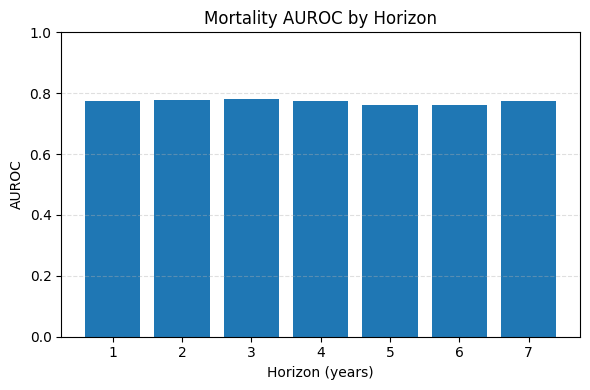

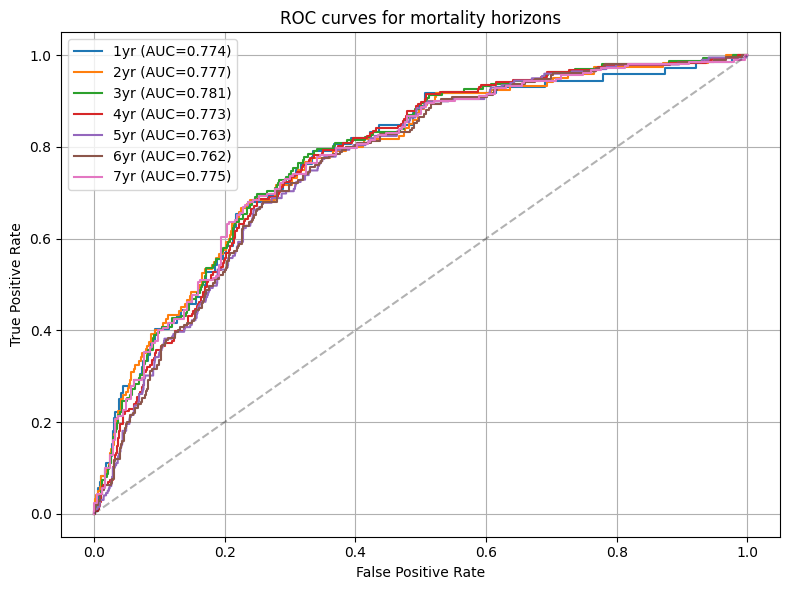

Saving validation predictions...


Saved predictions to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/val_mortality_preds_by_horizon.csv

Running Kaplan–Meier plots, Cox evaluation, and comparison...
Saved: km_val_overall.png
Saved: km_val_by_sex.png


/tmp/ipython-input-606984522.py:642: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_df in val_surv_df.groupby("age_group"):


Saved: km_val_by_age_groups.png

Cox (trained on train set) summary (first few rows):
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
age        0.061356   1.063277  0.002464        0.056527        0.066184   
is_male    0.472899   1.604639  0.068761        0.338130        0.607669   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to          z  \
covariate                                                                
age                   1.058155             1.068424     0.0  24.903583   
is_male               1.402322             1.836146     0.0   6.877410   

                       p    -log2(p)  
covariate                             
age        6.804131e-137  452.337738  
is_male     6.095063e-12   37.255496  
Saved Cox summary to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/cox_train_summary_used_for_eval.csv
Could not 

In [ ]:
#!/usr/bin/env python3
"""
Conformer + Extended Fusion (age + is_male + diagnoses + normal_ecg)
Full training script for multi-horizon mortality prediction (1-7 years).
Kaplan-Meier / Cox model with sex and age  (and get harzard ratio) and other predictions
"""

import os
import time
import json
import h5py
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqtnb
from tqdm import tqdm as tqd
import multiprocessing
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from contextlib import contextmanager
# survival analysis libs (install lifelines if needed: pip install lifelines)
from lifelines import KaplanMeierFitter, CoxPHFitter

# ------------------------
# USER CONFIG - change these
# ------------------------
#HDF5_ROOT = r"D:\Semester-4\15 Credit project work\Download\extracted_Dataset"
#CSV_PATH  = r"D:\Semester-4\15 Credit project work\Download\exams.csv"
#SAVE_DIR  = r"D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality"
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

HDF5_ROOT = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"
CSV_PATH = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
SAVE_DIR = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality"
os.makedirs(SAVE_DIR, exist_ok=True)

# Model / training hyperparams
BATCH_SIZE = 256
EPOCHS = 10
LR = 1e-3
ACCUM = 1                # gradient accumulation steps (not used but kept)
DIAGNOSIS_COLS = ["1dAVb","RBBB","LBBB","SB","ST","AF"]
HORIZONS = [1,2,3,4,5,6,7]   # years to evaluate
SEED = 42

# ------------------------
# Environment / device / AMP
# ------------------------
torch.manual_seed(SEED)
np.random.seed(SEED)

USE_GPU = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_GPU else "cpu")
print("Device:", DEVICE, "| GPU available:", USE_GPU)

# ================================
# UNIVERSAL AMP IMPORT (WORKS CPU/GPU)
# ================================
try:
    from torch.cuda.amp import GradScaler, autocast
    print("Using torch.cuda.amp (AMP available)")
except Exception:
    print("AMP NOT available, using dummy GradScaler/autocast")

    class GradScaler:
        def __init__(self, enabled=False): pass
        def scale(self, loss): return loss
        def step(self, optimizer): optimizer.step()
        def update(self): pass

    @contextmanager
    def autocast(enabled=False):
        yield

#scaler = GradScaler(enabled=USE_GPU)
scaler = torch.amp.GradScaler("cuda", enabled=USE_GPU)

# Provide a safe autocast context manager for CPU/GPU
if USE_GPU:
    @contextmanager
    def autocast_ctx():
        #with autocast(device_type="cuda", enabled=True):
        with torch.amp.autocast("cuda", enabled=True):

            yield
else:
    @contextmanager
    def autocast_ctx():
        yield

# ------------------------
# Helper: pick tqdm variant
# ------------------------
def get_tqdm():
    try:
        # prefer notebook tqdm if running in a notebook
        return tqtnb
    except Exception:
        return tqd

TQDM = get_tqdm()

# ------------------------
# Utility: choose num_workers safely
# ------------------------
def recommended_num_workers():
    cpu = multiprocessing.cpu_count()
    # If on Windows/Jupyter use 0 or 1 for safety
    if os.name == "nt":
        return 0
    # typical safe value: min(2, cpu-1)
    return max(0, min(2, cpu - 1))

NUM_WORKERS = recommended_num_workers()
print("num_workers chosen:", NUM_WORKERS)

# ------------------------
# Load CSV and check time column
# ------------------------
print("Loading CSV:", CSV_PATH)
df = pd.read_csv(CSV_PATH, low_memory=False)
df["exam_id"] = df["exam_id"].astype(str)

# check for a time column: prefer 'timey' (years), else 'time_days' or 'followup_days'
if "timey" not in df.columns:
    if "time_days" in df.columns:
        print("Converting time_days -> timey (years)")
        df["timey"] = df["time_days"].astype(float) / 365.25
    elif "followup_days" in df.columns:
        print("Converting followup_days -> timey (years)")
        df["timey"] = df["followup_days"].astype(float) / 365.25
    else:
        # If no time column present, we'll error out later — but set a placeholder
        print("Warning: no 'timey' or 'time_days' found. You must provide follow-up time; using zeros as placeholder.")
        df["timey"] = 0.0

# Ensure numeric columns exist and convert
# include is_male for sex
for col in DIAGNOSIS_COLS + ["normal_ecg", "age", "death", "timey", "is_male"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # create column of zeros if missing (diagnosis missing -> zeros)
        default = 0.0
        if col == "age":
            default = 0.0
        df[col] = default

# Drop rows with missing critical values
initial_rows = len(df)
df = df.dropna(subset=["death", "timey"] + DIAGNOSIS_COLS + ["normal_ecg", "age", "is_male"])
print(f"Rows before cleaning: {initial_rows}, after dropna: {len(df)}")

# ------------------------
# Build HDF5 index (pre-index exams in parts 0/1)
# ------------------------
print("Indexing HDF5 files under:", HDF5_ROOT)
hdf5_index = {}
for part in [0,1]:
    h5_path = f"{HDF5_ROOT}/exams_part{part}/exams_part{part}.hdf5"
    if not os.path.exists(h5_path):
        print("Warning: HDF5 not found:", h5_path)
        continue
    with h5py.File(h5_path, "r") as f:
        ids = f["exam_id"][:].astype(str)
        for i, eid in enumerate(ids):
            hdf5_index[eid] = (part, i)
print("Indexed HDF5 exam ids:", len(hdf5_index))

# Map part indices into df, drop rows not in HDF5
df["part"] = df["exam_id"].map(lambda x: hdf5_index.get(x, (np.nan, np.nan))[0])
df["h5pos"] = df["exam_id"].map(lambda x: hdf5_index.get(x, (np.nan, np.nan))[1])
df = df.dropna(subset=["part", "h5pos"])
df["part"] = df["part"].astype(int)
df["h5pos"] = df["h5pos"].astype(int)
print("Rows after mapping to HDF5:", len(df))

# ------------------------
# Train / val split
# ------------------------
print("Splitting train/val (stratify on death)...")
train_df, val_df = train_test_split(df, test_size=0.2, random_state=SEED, stratify=df["death"])
print("Train:", len(train_df), "Val:", len(val_df))

# ------------------------
# Fit Cox proportional hazards on the training set (baseline)
# ------------------------
print("\nFitting Cox PH baseline on train set...")
cox = CoxPHFitter()
# Ensure the necessary columns exist on train_df
cox_train_df = train_df[["timey", "death", "age", "is_male"]].copy()
# drop rows with missing (shouldn't be many since you cleaned earlier)
cox_train_df = cox_train_df.dropna(subset=["timey", "death", "age", "is_male"])
cox.fit(cox_train_df, duration_col="timey", event_col="death")
# save summary
cox.summary.to_csv(os.path.join(SAVE_DIR, "cox_train_summary.csv"))
print("Saved Cox summary to", os.path.join(SAVE_DIR, "cox_train_summary.csv"))
# keep cox object for later prediction on val set


# Save small info
pd.DataFrame({"n_train":[len(train_df)], "n_val":[len(val_df)]}).to_csv(os.path.join(SAVE_DIR,"split_info.csv"), index=False)

# ------------------------
# Dataset (uses pre-indexed pos & part)
# ------------------------
class ECGDatasetSurvival(Dataset):
    def __init__(self, df, hdf5_root, diag_cols, horizons=HORIZONS):
        self.df = df.reset_index(drop=True).copy()
        self.root = hdf5_root
        self.diag_cols = diag_cols
        self.horizons = horizons

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        part = int(row.part)
        pos = int(row.h5pos)
        h5_path = f"{self.root}/exams_part{part}/exams_part{part}.hdf5"
        with h5py.File(h5_path, "r") as f:
            ecg = f["tracings"][pos].astype(np.float32)
        # Ensure shape (12, L)
        if ecg.shape[0] != 12:
            ecg = ecg.T
        ecg = torch.tensor(ecg, dtype=torch.float32)   # (12, L)
        # scalars
        death = float(row.death)
        timey = float(row.timey)
        labels_diag = torch.tensor([float(row[c]) for c in self.diag_cols], dtype=torch.float32)
        age = float(row.age)
        is_male = float(row.is_male)
        normal = float(row.normal_ecg)
        return {
            "ecg": ecg,
            "death": torch.tensor([death], dtype=torch.float32),
            "timey": torch.tensor([timey], dtype=torch.float32),
            "labels": labels_diag,
            "age": torch.tensor([age], dtype=torch.float32),
            "is_male": torch.tensor([is_male], dtype=torch.float32),
            "normal": torch.tensor([normal], dtype=torch.float32),
            "exam_id": str(row.exam_id),
            "patient_id": row.get("patient_id", None)
        }

def collate_surv(batch):
    return {
        "ecg": torch.stack([b["ecg"] for b in batch]),
        "death": torch.stack([b["death"] for b in batch]),
        "timey": torch.stack([b["timey"] for b in batch]),
        "labels": torch.stack([b["labels"] for b in batch]),
        "age": torch.stack([b["age"] for b in batch]),
        "is_male": torch.stack([b["is_male"] for b in batch]),
        "normal": torch.stack([b["normal"] for b in batch]),
        "exam_id": [b["exam_id"] for b in batch],
        "patient_id": [b["patient_id"] for b in batch],
    }

# ------------------------
# Model: Lite Conformer with Fusion (ECG + age + is_male + diag + normal)
# ------------------------
class LiteConformerBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.ff = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim*2),
            nn.ReLU(),
            nn.Linear(dim*2, dim)
        )
        self.attn = nn.MultiheadAttention(dim, num_heads=2, batch_first=True)
        self.conv = nn.Sequential(
            nn.Conv1d(dim, dim, kernel_size=15, padding=7, groups=dim),
            nn.ReLU(),
            nn.Conv1d(dim, dim, kernel_size=1)
        )
        self.norm = nn.LayerNorm(dim)

    def forward(self, x):
        x = x + self.ff(x)
        x = x + self.attn(x, x, x)[0]
        xc = self.conv(x.transpose(1,2)).transpose(1,2)
        return self.norm(x + xc)

class ConformerECG_Fusion(nn.Module):
    def __init__(self, d_model=64, num_diag=len(DIAGNOSIS_COLS), n_horizons=len(HORIZONS)):
        super().__init__()

        # ECG encoder
        self.down = nn.Conv1d(12, 12, kernel_size=4, stride=4)
        self.proj = nn.Conv1d(12, d_model, kernel_size=1)
        self.blocks = nn.ModuleList([LiteConformerBlock(d_model) for _ in range(2)])
        self.pool = nn.AdaptiveAvgPool1d(1)

        # Patient Fusion MLP
        # age(1) + is_male(1) + diagnoses(6) + normal(1) = 9 features
        fusion_in = 9
        self.fusion = nn.Sequential(
            nn.Linear(fusion_in, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU()
        )

        # Final heads
        self.death = nn.Linear(d_model + 32, n_horizons)
        self.diagnosis = nn.Linear(d_model + 32, num_diag)
        self.age = nn.Linear(d_model + 32, 1)
        self.normal = nn.Linear(d_model + 32, 1)

    def forward(self, x, age, is_male, diag, normal):
        """
        x: ECG tensor (B, 12, L)
        age: (B,1)
        is_male: (B,1)
        diag: (B,6)
        normal: (B,1)
        """

        # ECG feature extraction
        x = self.down(x)            # (B,12,L/4)
        x = self.proj(x)            # (B,d_model,L/4)
        x = x.transpose(1, 2)       # (B,L, d_model)
        for blk in self.blocks:
            x = blk(x)
        x = x.transpose(1, 2)       # (B, d_model, L)
        x = self.pool(x).squeeze(-1)  # (B, d_model)

        # Patient fusion
        patient = torch.cat([age, is_male, diag, normal], dim=1)  # (B,9)
        patient_feat = self.fusion(patient)                      # (B,32)

        # Combine ECG + patient
        z = torch.cat([x, patient_feat], dim=1)  # (B, d_model+32)

        # Heads
        return {
            "death": self.death(z),
            "diagnosis": self.diagnosis(z),
            "age": self.age(z),
            "normal": self.normal(z)
        }

# ------------------------
# Multi-horizon masked BCE loss and other losses
# ------------------------
bce_logits = nn.BCEWithLogitsLoss(reduction="none")
mse_loss_fn = nn.MSELoss()

def death_horizon_loss(logits, timey, event, horizons=HORIZONS):
    """
    logits: (B,H), timey/event: (B,1)
    returns: (loss scalar, labels_np (B,H), mask_np (B,H) bool)
    """
    B, H = logits.shape
    device = logits.device
    timey = timey.squeeze(1)
    event = event.squeeze(1)
    labels = torch.zeros((B,H), device=device)
    mask = torch.zeros((B,H), device=device)
    for i,k in enumerate(horizons):
        valid = (event == 1) | (timey >= float(k))
        mask[:, i] = valid.float()
        label_pos = (event == 1) & (timey <= float(k))
        labels[:, i] = label_pos.float()
    loss_mat = bce_logits(logits, labels)
    masked_sum = (loss_mat * mask).sum()
    denom = mask.sum().clamp_min(1.0)
    loss = masked_sum / denom
    return loss, labels.detach().cpu().numpy(), mask.detach().cpu().numpy().astype(bool)

# ------------------------
# Build datasets & loaders
# ------------------------
print("Preparing datasets and loaders...")
train_ds = ECGDatasetSurvival(train_df, HDF5_ROOT, DIAGNOSIS_COLS, horizons=HORIZONS)
val_ds   = ECGDatasetSurvival(val_df,   HDF5_ROOT, DIAGNOSIS_COLS, horizons=HORIZONS)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, collate_fn=collate_surv)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, collate_fn=collate_surv)

print("Train batches:", len(train_loader), "Val batches:", len(val_loader))

# ------------------------
# Instantiate model, optimizer, scheduler
# ------------------------
model = ConformerECG_Fusion().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)

# ------------------------
# Training loop with tqdm + AMP if GPU
# ------------------------
best_val7 = -np.inf
history = {"train_loss": [], "val_loss": [], "aucs": []}

PROG = TQDM

print("\n=== TRAINING START ===")
for epoch in range(1, EPOCHS+1):
    model.train()
    running = 0.0
    it = 0
    train_bar = PROG(train_loader, desc=f"Epoch {epoch}/{EPOCHS} Train", leave=False)
    for batch in train_bar:
        x = batch["ecg"].to(DEVICE)
        timey = batch["timey"].to(DEVICE)
        event = batch["death"].to(DEVICE)
        labels_diag = batch["labels"].to(DEVICE)
        age = batch["age"].to(DEVICE)
        is_male = batch["is_male"].to(DEVICE)
        normal = batch["normal"].to(DEVICE)

        with autocast_ctx():
            out = model(x, age, is_male, labels_diag, normal)
            death_logits = out["death"]
            diag_logits = out["diagnosis"]
            age_pred = out["age"]
            normal_pred = out["normal"]

            death_loss, _, _ = death_horizon_loss(death_logits, timey, event, horizons=HORIZONS)
            diag_loss = bce_logits(diag_logits, labels_diag).mean()
            age_loss = mse_loss_fn(age_pred, age)
            normal_loss = bce_logits(normal_pred, normal).mean()

            loss = death_loss + diag_loss + 0.1*age_loss + normal_loss
            loss_val = loss.item()

        optimizer.zero_grad()
        if USE_GPU:
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            optimizer.step()

        running += loss_val
        it += 1
        if it % 10 == 0:
            train_bar.set_postfix(loss=f"{running/it:.4f}")

    avg_train_loss = running / max(1, it)
    history["train_loss"].append(avg_train_loss)
    print(f"Epoch {epoch} Train Loss: {avg_train_loss:.4f}")

    # -------------------------
    # Validation
    # -------------------------
    model.eval()
    val_running = 0.0
    all_preds = {k: [] for k in HORIZONS}
    all_labels = {k: [] for k in HORIZONS}

    val_bar = PROG(val_loader, desc=f"Epoch {epoch}/{EPOCHS} Val", leave=False)
    with torch.no_grad():
        for batch in val_bar:
            x = batch["ecg"].to(DEVICE)
            timey = batch["timey"].to(DEVICE)
            event = batch["death"].to(DEVICE)
            labels_diag = batch["labels"].to(DEVICE)
            age = batch["age"].to(DEVICE)
            is_male = batch["is_male"].to(DEVICE)
            normal = batch["normal"].to(DEVICE)

            out = model(x, age, is_male, labels_diag, normal)
            death_logits = out["death"]
            diag_logits = out["diagnosis"]
            age_pred = out["age"]
            normal_pred = out["normal"]

            death_loss, labels_np, mask_np = death_horizon_loss(death_logits, timey, event, horizons=HORIZONS)
            diag_loss = bce_logits(diag_logits, labels_diag).mean()
            age_loss = mse_loss_fn(age_pred, age)
            normal_loss = bce_logits(normal_pred, normal).mean()

            val_running += (death_loss.item() + diag_loss.item() + 0.1*age_loss.item() + normal_loss.item())

            probs = torch.sigmoid(death_logits).cpu().numpy()   # (B,H)
            # labels_np, mask_np are np arrays
            for h_idx, k in enumerate(HORIZONS):
                mask_h = mask_np[:, h_idx]
                if mask_h.sum() == 0:
                    continue
                preds_h = probs[mask_h, h_idx]
                labs_h  = labels_np[mask_h, h_idx]
                all_preds[k].extend(preds_h.tolist())
                all_labels[k].extend(labs_h.tolist())

    avg_val_loss = val_running / max(1, len(val_loader))
    history["val_loss"].append(avg_val_loss)
    print(f"Epoch {epoch} Val Loss: {avg_val_loss:.4f}")

    # compute AUROCs per horizon
    aucs = {}
    for k in HORIZONS:
        y_true = np.array(all_labels[k])
        y_score = np.array(all_preds[k])
        if len(y_true) == 0 or len(np.unique(y_true)) < 2:
            aucs[k] = np.nan
        else:
            try:
                aucs[k] = roc_auc_score(y_true, y_score)
            except Exception:
                aucs[k] = np.nan
    history["aucs"].append(aucs)
    print("AUROCs:", {k: (f"{aucs[k]:.4f}" if not np.isnan(aucs[k]) else "nan") for k in HORIZONS})

    # save best by 7yr AUC
    val7 = aucs.get(7, np.nan)
    if not np.isnan(val7) and val7 > best_val7:
        best_val7 = val7
        best_path = os.path.join(SAVE_DIR, "best_model_7yr.pth")
        torch.save(model.state_dict(), best_path)
        print("Saved best model to", best_path)

    # scheduler step on val loss
    scheduler.step(avg_val_loss)

# ------------------------
# After training: plots and final metrics
# ------------------------
final_aucs = history["aucs"][-1] if len(history["aucs"])>0 else {}
years = HORIZONS
aucs_plot = [final_aucs.get(k, np.nan) for k in years]

plt.figure(figsize=(6,4))
plt.bar(years, [x if not np.isnan(x) else 0 for x in aucs_plot])
plt.ylim(0.0, 1.0)
plt.xlabel("Horizon (years)")
plt.ylabel("AUROC")
plt.title("Mortality AUROC by Horizon")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(years)
plt.tight_layout()
plt.show()

# ROC curves for available horizons (use last epoch's collected preds in loop variables)
plt.figure(figsize=(8,6))
plotted = 0
for k in HORIZONS:
    y_true = np.array(all_labels[k]) if 'all_labels' in locals() else np.array([])
    y_score = np.array(all_preds[k]) if 'all_preds' in locals() else np.array([])
    if len(y_true) == 0 or len(np.unique(y_true)) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr, label=f"{k}yr (AUC={roc_auc_score(y_true,y_score):.3f})")
    plotted += 1

if plotted > 0:
    plt.plot([0,1],[0,1],"k--", alpha=0.3)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curves for mortality horizons")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("No ROC curves to plot (not enough valid samples per horizon).")

# ------------------------
# Save predictions on validation set
# ------------------------
print("Saving validation predictions...")
pred_rows = []
model.eval()
with torch.no_grad():
    for batch in tqd(val_loader, desc="Save preds", leave=False):
        x = batch["ecg"].to(DEVICE)
        timey = batch["timey"].numpy().flatten()
        event = batch["death"].numpy().flatten()
        exam_ids = batch["exam_id"]
        age = batch["age"].to(DEVICE)
        is_male = batch["is_male"].to(DEVICE)
        diag = batch["labels"].to(DEVICE)
        normal = batch["normal"].to(DEVICE)
        out = model(x, age, is_male, diag, normal)
        probs = torch.sigmoid(out["death"]).cpu().numpy()
        for i, eid in enumerate(exam_ids):
            row = {"exam_id": eid, "death": int(event[i]), "timey": float(timey[i])}
            for h_idx, k in enumerate(HORIZONS):
                row[f"pred_p_{k}yr"] = float(probs[i, h_idx])
            pred_rows.append(row)

pred_df = pd.DataFrame(pred_rows)
pred_path = os.path.join(SAVE_DIR, "val_mortality_preds_by_horizon.csv")
pred_df.to_csv(pred_path, index=False)
print("Saved predictions to", pred_path)

# ------------------------
# Kaplan-Meier plots, Cox HRs, and Neural vs Cox comparison
# ------------------------
print("\nRunning Kaplan–Meier plots, Cox evaluation, and comparison...")

# Use validation dataframe for KM plots / comparison
val_surv_df = val_df[["timey", "death", "age", "is_male"]].copy()

# --- Kaplan–Meier overall
km = KaplanMeierFitter()
km.fit(val_surv_df["timey"], event_observed=val_surv_df["death"], label="Overall")
plt.figure(figsize=(6,4))
km.plot_survival_function()
plt.title("KM: Overall (validation)")
plt.xlabel("Time (years)")
plt.ylabel("Survival probability")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_val_overall.png"))
plt.close()
print("Saved:", "km_val_overall.png")

# --- KM by sex
male_df = val_surv_df[val_surv_df["is_male"] == 1]
female_df = val_surv_df[val_surv_df["is_male"] == 0]
km_m = KaplanMeierFitter(); km_f = KaplanMeierFitter()
plt.figure(figsize=(6,4))
if len(male_df) > 0:
    km_m.fit(male_df["timey"], male_df["death"], label="Male")
    km_m.plot_survival_function()
if len(female_df) > 0:
    km_f.fit(female_df["timey"], female_df["death"], label="Female")
    km_f.plot_survival_function()
plt.title("KM: by sex (validation)")
plt.xlabel("Time (years)"); plt.ylabel("Survival probability"); plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_val_by_sex.png"))
plt.close()
print("Saved:", "km_val_by_sex.png")

# --- KM by age groups
val_surv_df["age_group"] = pd.cut(val_surv_df["age"], bins=[0,40,60,120],
                                  labels=["Young (≤40)","Middle (40–60)","Older (≥60)"])
plt.figure(figsize=(7,5))
for group_name, group_df in val_surv_df.groupby("age_group"):
    if len(group_df) < 10:
        continue
    km_g = KaplanMeierFitter()
    km_g.fit(group_df["timey"], group_df["death"], label=str(group_name))
    km_g.plot_survival_function()
plt.title("KM: by age groups (validation)")
plt.xlabel("Time (years)"); plt.ylabel("Survival probability"); plt.legend()
plt.grid(alpha=0.3); plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_val_by_age_groups.png"))
plt.close()
print("Saved:", "km_val_by_age_groups.png")

# --- Cox hazard ratios (from Cox fitted on train set earlier)
print("\nCox (trained on train set) summary (first few rows):")
try:
    print(cox.summary)
    cox.summary.to_csv(os.path.join(SAVE_DIR, "cox_train_summary_used_for_eval.csv"))
    print("Saved Cox summary to", os.path.join(SAVE_DIR, "cox_train_summary_used_for_eval.csv"))
except Exception as e:
    print("Could not print/save Cox summary:", e)

# --- Compare Neural model (pred_df) vs Cox (risk) at 7-year horizon
val_preds_path = pred_path
val_pred_df = pd.read_csv(val_preds_path)

# Prepare y_true (7-year event labels) and mask consistent with your training logic:
y_true = val_pred_df["death"].astype(int)
y_time = val_pred_df["timey"].astype(float)

mask_7yr = (y_time >= 7) | (y_true == 1)          # same logic: keep if event or followed >=7y
y_true_7yr = ((y_true == 1) & (y_time <= 7))[mask_7yr]  # events within 5yr are positives

# Neural preds for 5yr (from your saved preds)
if f"pred_p_7yr" in val_pred_df.columns:
    nn_scores = val_pred_df.loc[mask_7yr, f"pred_p_7yr"].astype(float).values
else:
    nn_scores = None

# Cox risk: compute partial hazard for each validation exam using cox fitted on train
# We need validation covariates in same order as train used
val_covs = val_df.loc[val_df["exam_id"].isin(val_pred_df["exam_id"]), ["age", "is_male"]].copy()
# Ensure index alignment to val_pred_df order
val_covs = val_covs.set_index(val_df.loc[val_df["exam_id"].isin(val_pred_df["exam_id"])].index)
cox_risk = None
try:
    # predict_partial_hazard returns a pandas Series indexed like val_covs
    cox_risk_series = cox.predict_partial_hazard(val_covs)
    # align to val_pred_df by index order used above
    cox_scores = cox_risk_series.loc[val_covs.index].astype(float).values
except Exception as e:
    print("Could not compute Cox risk on validation set:", e)
    cox_scores = None

# compute AUCs if possible
from sklearn.metrics import roc_auc_score
if nn_scores is not None and len(np.unique(y_true_7yr)) > 1:
    try:
        auc_nn = roc_auc_score(y_true_7yr, nn_scores)
        print(f"Neural model AUC @5yr (validation subset): {auc_nn:.3f}")
    except Exception as e:
        print("Neural AUC failed:", e)
else:
    print("Neural model AUC not computed (missing preds or only one label).")

# For Cox, need to filter the same mask_7yr rows and ensure cox_scores aligns
if cox_scores is not None:
    # We created cox_scores aligned to val_covs which correspond to val_pred_df order subset; now apply mask
    try:
        cox_scores_masked = cox_scores[mask_7yr]
        if len(np.unique(y_true_7yr)) > 1:
            auc_cox = roc_auc_score(y_true_7yr, cox_scores_masked)
            print(f"Cox model AUC @7yr (validation subset):    {auc_cox:.3f}")
        else:
            print("Cox AUC not computed (only one label present).")
    except Exception as e:
        print("Cox AUC failed:", e)
else:
    print("Cox scores not available, skipping Cox AUC.")


# Save training history
with open(os.path.join(SAVE_DIR, "history.json"), "w") as f:
    json.dump(history, f, indent=2)
print("Saved history to", os.path.join(SAVE_DIR, "history.json"))

print("Done.")


Device: cuda | GPU available: True
Using torch.cuda.amp (AMP available)
num_workers chosen: 2
Loading CSV: /content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv
Rows before cleaning: 345779, after dropna: 233647
Indexing HDF5 files under: /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams
Indexed HDF5 exam ids: 40001
Rows after mapping to HDF5: 28316
Splitting train/val (stratify on death)...
Train: 22652 Val: 5664

Fitting Cox PH baseline on train set...
Saved Cox summary to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/cox_train_summary.csv
Preparing datasets and loaders...
Train batches: 89 Val batches: 23

=== TRAINING START ===


Epoch 1/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 1 Train Loss: 149.3102


Epoch 1/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 1 Val Loss: 9.8837
AUROCs: {1: '0.2274', 2: '0.2243', 3: '0.2205', 4: '0.2279', 5: '0.2224', 6: '0.7694', 7: '0.7768'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_7yr.pth


Epoch 2/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 2 Train Loss: 2.5838


Epoch 2/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 2 Val Loss: 1.6398
AUROCs: {1: '0.2278', 2: '0.2234', 3: '0.2271', 4: '0.7773', 5: '0.6635', 6: '0.7668', 7: '0.7779'}
Saved best model to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/best_model_7yr.pth


Epoch 3/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 3 Train Loss: 1.1693


Epoch 3/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 3 Val Loss: 0.9642
AUROCs: {1: '0.2284', 2: '0.2246', 3: '0.7816', 4: '0.7716', 5: '0.7002', 6: '0.7644', 7: '0.7747'}


Epoch 4/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 4 Train Loss: 0.9307


Epoch 4/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 4 Val Loss: 0.9195
AUROCs: {1: '0.2286', 2: '0.2308', 3: '0.7800', 4: '0.7711', 5: '0.7590', 6: '0.7627', 7: '0.7739'}


Epoch 5/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 5 Train Loss: 0.9061


Epoch 5/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 5 Val Loss: 0.9088
AUROCs: {1: '0.2390', 2: '0.7404', 3: '0.7798', 4: '0.7703', 5: '0.7602', 6: '0.7616', 7: '0.7733'}


Epoch 6/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 6 Train Loss: 0.8952


Epoch 6/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 6 Val Loss: 0.9008
AUROCs: {1: '0.7619', 2: '0.7741', 3: '0.7806', 4: '0.7720', 5: '0.7617', 6: '0.7621', 7: '0.7744'}


Epoch 7/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 7 Train Loss: 0.8878


Epoch 7/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 7 Val Loss: 0.9006
AUROCs: {1: '0.7739', 2: '0.7757', 3: '0.7808', 4: '0.7725', 5: '0.7622', 6: '0.7622', 7: '0.7750'}


Epoch 8/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 8 Train Loss: 0.8839


Epoch 8/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 8 Val Loss: 0.8879
AUROCs: {1: '0.7746', 2: '0.7764', 3: '0.7809', 4: '0.7725', 5: '0.7627', 6: '0.7621', 7: '0.7753'}


Epoch 9/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 9 Train Loss: 0.8740


Epoch 9/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 9 Val Loss: 0.8795
AUROCs: {1: '0.7747', 2: '0.7766', 3: '0.7809', 4: '0.7726', 5: '0.7627', 6: '0.7620', 7: '0.7751'}


Epoch 10/10 Train:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 10 Train Loss: 0.8670


Epoch 10/10 Val:   0%|          | 0/23 [00:00<?, ?it/s]

Epoch 10 Val Loss: 0.8817
AUROCs: {1: '0.7743', 2: '0.7769', 3: '0.7810', 4: '0.7729', 5: '0.7627', 6: '0.7618', 7: '0.7746'}


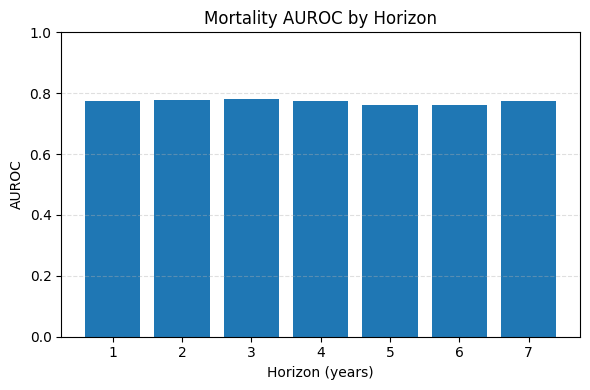

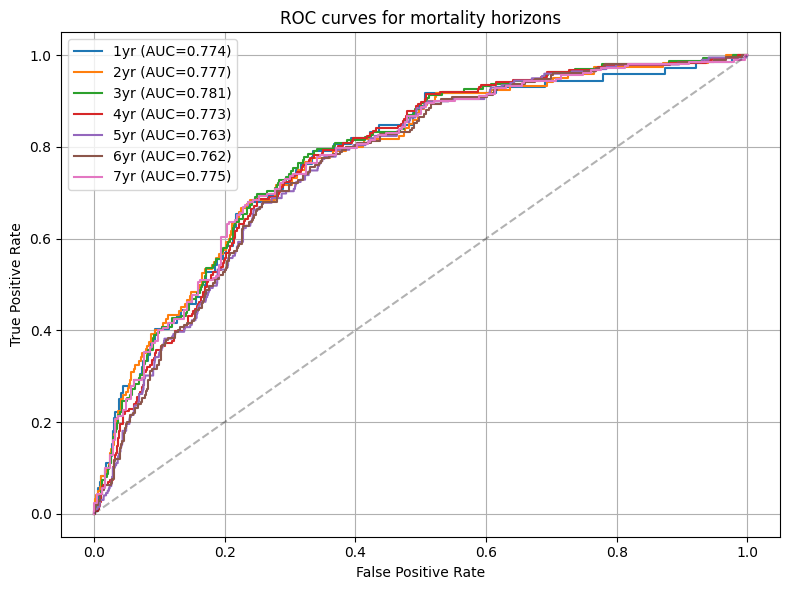

Saving validation predictions...


Saved predictions to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/val_mortality_preds_by_horizon.csv

Running Kaplan–Meier plots, Cox evaluation, and comparison...
Saved: km_val_overall.png
Saved: km_val_by_sex.png


/tmp/ipython-input-966877469.py:643: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_df in val_surv_df.groupby("age_group"):


Saved: km_val_by_age_groups.png

Cox (trained on train set) summary (first few rows):
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
age        0.061356   1.063277  0.002464        0.056527        0.066184   
is_male    0.472899   1.604639  0.068761        0.338130        0.607669   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to          z  \
covariate                                                                
age                   1.058155             1.068424     0.0  24.903583   
is_male               1.402322             1.836146     0.0   6.877410   

                       p    -log2(p)  
covariate                             
age        6.804131e-137  452.337738  
is_male     6.095063e-12   37.255496  
Saved Cox summary to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/cox_train_summary_used_for_eval.csv
Could not 

/tmp/ipython-input-966877469.py:775: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for grp, df_g in val_surv_df.groupby("age_group"):


Saved KM: km_by_age_group.png
Saved Cox hazard ratios: cox_hazard_ratios.csv
Saved Cox HR plot: cox_hazard_ratios.png
Neural model AUC @ 7yr: 0.775
Cox model AUC @ 7yr:    0.795
Saved comparison plot: auc_nn_vs_cox_7yr.png
Saved history to /content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality/history.json
Done.


In [ ]:
#!/usr/bin/env python3
"""
Conformer + Extended Fusion (age + is_male + diagnoses + normal_ecg)
Full training script for multi-horizon mortality prediction (1-7 years).
Kaplan-Meier / Cox model with sex and age  (and get harzard ratio) and other predictions
With all comparison and plots by parameter Age, Sex and Year
"""

import os
import time
import json
import h5py
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqtnb
from tqdm import tqdm as tqd
import multiprocessing
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from contextlib import contextmanager
# survival analysis libs (install lifelines if needed: pip install lifelines)
from lifelines import KaplanMeierFitter, CoxPHFitter

# ------------------------
# USER CONFIG - change these
# ------------------------
#HDF5_ROOT = r"D:\Semester-4\15 Credit project work\Download\extracted_Dataset"
#CSV_PATH  = r"D:\Semester-4\15 Credit project work\Download\exams.csv"
#SAVE_DIR  = r"D:\Semester-4\15 Credit project work\Download\extracted_Dataset\results_mortality"
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

HDF5_ROOT = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"
CSV_PATH = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
SAVE_DIR = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams/results_mortality"
os.makedirs(SAVE_DIR, exist_ok=True)

# Model / training hyperparams
BATCH_SIZE = 256
EPOCHS = 10
LR = 1e-3
ACCUM = 1                # gradient accumulation steps (not used but kept)
DIAGNOSIS_COLS = ["1dAVb","RBBB","LBBB","SB","ST","AF"]
HORIZONS = [1,2,3,4,5,6,7]   # years to evaluate
SEED = 42

# ------------------------
# Environment / device / AMP
# ------------------------
torch.manual_seed(SEED)
np.random.seed(SEED)

USE_GPU = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_GPU else "cpu")
print("Device:", DEVICE, "| GPU available:", USE_GPU)

# ================================
# UNIVERSAL AMP IMPORT (WORKS CPU/GPU)
# ================================
try:
    from torch.cuda.amp import GradScaler, autocast
    print("Using torch.cuda.amp (AMP available)")
except Exception:
    print("AMP NOT available, using dummy GradScaler/autocast")

    class GradScaler:
        def __init__(self, enabled=False): pass
        def scale(self, loss): return loss
        def step(self, optimizer): optimizer.step()
        def update(self): pass

    @contextmanager
    def autocast(enabled=False):
        yield

#scaler = GradScaler(enabled=USE_GPU)
scaler = torch.amp.GradScaler("cuda", enabled=USE_GPU)

# Provide a safe autocast context manager for CPU/GPU
if USE_GPU:
    @contextmanager
    def autocast_ctx():
        #with autocast(device_type="cuda", enabled=True):
        with torch.amp.autocast("cuda", enabled=True):

            yield
else:
    @contextmanager
    def autocast_ctx():
        yield

# ------------------------
# Helper: pick tqdm variant
# ------------------------
def get_tqdm():
    try:
        # prefer notebook tqdm if running in a notebook
        return tqtnb
    except Exception:
        return tqd

TQDM = get_tqdm()

# ------------------------
# Utility: choose num_workers safely
# ------------------------
def recommended_num_workers():
    cpu = multiprocessing.cpu_count()
    # If on Windows/Jupyter use 0 or 1 for safety
    if os.name == "nt":
        return 0
    # typical safe value: min(2, cpu-1)
    return max(0, min(2, cpu - 1))

NUM_WORKERS = recommended_num_workers()
print("num_workers chosen:", NUM_WORKERS)

# ------------------------
# Load CSV and check time column
# ------------------------
print("Loading CSV:", CSV_PATH)
df = pd.read_csv(CSV_PATH, low_memory=False)
df["exam_id"] = df["exam_id"].astype(str)

# check for a time column: prefer 'timey' (years), else 'time_days' or 'followup_days'
if "timey" not in df.columns:
    if "time_days" in df.columns:
        print("Converting time_days -> timey (years)")
        df["timey"] = df["time_days"].astype(float) / 365.25
    elif "followup_days" in df.columns:
        print("Converting followup_days -> timey (years)")
        df["timey"] = df["followup_days"].astype(float) / 365.25
    else:
        # If no time column present, we'll error out later — but set a placeholder
        print("Warning: no 'timey' or 'time_days' found. You must provide follow-up time; using zeros as placeholder.")
        df["timey"] = 0.0

# Ensure numeric columns exist and convert
# include is_male for sex
for col in DIAGNOSIS_COLS + ["normal_ecg", "age", "death", "timey", "is_male"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        # create column of zeros if missing (diagnosis missing -> zeros)
        default = 0.0
        if col == "age":
            default = 0.0
        df[col] = default

# Drop rows with missing critical values
initial_rows = len(df)
df = df.dropna(subset=["death", "timey"] + DIAGNOSIS_COLS + ["normal_ecg", "age", "is_male"])
print(f"Rows before cleaning: {initial_rows}, after dropna: {len(df)}")

# ------------------------
# Build HDF5 index (pre-index exams in parts 0/1)
# ------------------------
print("Indexing HDF5 files under:", HDF5_ROOT)
hdf5_index = {}
for part in [0,1]:
    h5_path = f"{HDF5_ROOT}/exams_part{part}/exams_part{part}.hdf5"
    if not os.path.exists(h5_path):
        print("Warning: HDF5 not found:", h5_path)
        continue
    with h5py.File(h5_path, "r") as f:
        ids = f["exam_id"][:].astype(str)
        for i, eid in enumerate(ids):
            hdf5_index[eid] = (part, i)
print("Indexed HDF5 exam ids:", len(hdf5_index))

# Map part indices into df, drop rows not in HDF5
df["part"] = df["exam_id"].map(lambda x: hdf5_index.get(x, (np.nan, np.nan))[0])
df["h5pos"] = df["exam_id"].map(lambda x: hdf5_index.get(x, (np.nan, np.nan))[1])
df = df.dropna(subset=["part", "h5pos"])
df["part"] = df["part"].astype(int)
df["h5pos"] = df["h5pos"].astype(int)
print("Rows after mapping to HDF5:", len(df))

# ------------------------
# Train / val split
# ------------------------
print("Splitting train/val (stratify on death)...")
train_df, val_df = train_test_split(df, test_size=0.2, random_state=SEED, stratify=df["death"])
print("Train:", len(train_df), "Val:", len(val_df))

# ------------------------
# Fit Cox proportional hazards on the training set (baseline)
# ------------------------
print("\nFitting Cox PH baseline on train set...")
cox = CoxPHFitter()
# Ensure the necessary columns exist on train_df
cox_train_df = train_df[["timey", "death", "age", "is_male"]].copy()
# drop rows with missing (shouldn't be many since you cleaned earlier)
cox_train_df = cox_train_df.dropna(subset=["timey", "death", "age", "is_male"])
cox.fit(cox_train_df, duration_col="timey", event_col="death")
# save summary
cox.summary.to_csv(os.path.join(SAVE_DIR, "cox_train_summary.csv"))
print("Saved Cox summary to", os.path.join(SAVE_DIR, "cox_train_summary.csv"))
# keep cox object for later prediction on val set


# Save small info
pd.DataFrame({"n_train":[len(train_df)], "n_val":[len(val_df)]}).to_csv(os.path.join(SAVE_DIR,"split_info.csv"), index=False)

# ------------------------
# Dataset (uses pre-indexed pos & part)
# ------------------------
class ECGDatasetSurvival(Dataset):
    def __init__(self, df, hdf5_root, diag_cols, horizons=HORIZONS):
        self.df = df.reset_index(drop=True).copy()
        self.root = hdf5_root
        self.diag_cols = diag_cols
        self.horizons = horizons

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        part = int(row.part)
        pos = int(row.h5pos)
        h5_path = f"{self.root}/exams_part{part}/exams_part{part}.hdf5"
        with h5py.File(h5_path, "r") as f:
            ecg = f["tracings"][pos].astype(np.float32)
        # Ensure shape (12, L)
        if ecg.shape[0] != 12:
            ecg = ecg.T
        ecg = torch.tensor(ecg, dtype=torch.float32)   # (12, L)
        # scalars
        death = float(row.death)
        timey = float(row.timey)
        labels_diag = torch.tensor([float(row[c]) for c in self.diag_cols], dtype=torch.float32)
        age = float(row.age)
        is_male = float(row.is_male)
        normal = float(row.normal_ecg)
        return {
            "ecg": ecg,
            "death": torch.tensor([death], dtype=torch.float32),
            "timey": torch.tensor([timey], dtype=torch.float32),
            "labels": labels_diag,
            "age": torch.tensor([age], dtype=torch.float32),
            "is_male": torch.tensor([is_male], dtype=torch.float32),
            "normal": torch.tensor([normal], dtype=torch.float32),
            "exam_id": str(row.exam_id),
            "patient_id": row.get("patient_id", None)
        }

def collate_surv(batch):
    return {
        "ecg": torch.stack([b["ecg"] for b in batch]),
        "death": torch.stack([b["death"] for b in batch]),
        "timey": torch.stack([b["timey"] for b in batch]),
        "labels": torch.stack([b["labels"] for b in batch]),
        "age": torch.stack([b["age"] for b in batch]),
        "is_male": torch.stack([b["is_male"] for b in batch]),
        "normal": torch.stack([b["normal"] for b in batch]),
        "exam_id": [b["exam_id"] for b in batch],
        "patient_id": [b["patient_id"] for b in batch],
    }

# ------------------------
# Model: Lite Conformer with Fusion (ECG + age + is_male + diag + normal)
# ------------------------
class LiteConformerBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.ff = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim*2),
            nn.ReLU(),
            nn.Linear(dim*2, dim)
        )
        self.attn = nn.MultiheadAttention(dim, num_heads=2, batch_first=True)
        self.conv = nn.Sequential(
            nn.Conv1d(dim, dim, kernel_size=15, padding=7, groups=dim),
            nn.ReLU(),
            nn.Conv1d(dim, dim, kernel_size=1)
        )
        self.norm = nn.LayerNorm(dim)

    def forward(self, x):
        x = x + self.ff(x)
        x = x + self.attn(x, x, x)[0]
        xc = self.conv(x.transpose(1,2)).transpose(1,2)
        return self.norm(x + xc)

class ConformerECG_Fusion(nn.Module):
    def __init__(self, d_model=64, num_diag=len(DIAGNOSIS_COLS), n_horizons=len(HORIZONS)):
        super().__init__()

        # ECG encoder
        self.down = nn.Conv1d(12, 12, kernel_size=4, stride=4)
        self.proj = nn.Conv1d(12, d_model, kernel_size=1)
        self.blocks = nn.ModuleList([LiteConformerBlock(d_model) for _ in range(2)])
        self.pool = nn.AdaptiveAvgPool1d(1)

        # Patient Fusion MLP
        # age(1) + is_male(1) + diagnoses(6) + normal(1) = 9 features
        fusion_in = 9
        self.fusion = nn.Sequential(
            nn.Linear(fusion_in, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU()
        )

        # Final heads
        self.death = nn.Linear(d_model + 32, n_horizons)
        self.diagnosis = nn.Linear(d_model + 32, num_diag)
        self.age = nn.Linear(d_model + 32, 1)
        self.normal = nn.Linear(d_model + 32, 1)

    def forward(self, x, age, is_male, diag, normal):
        """
        x: ECG tensor (B, 12, L)
        age: (B,1)
        is_male: (B,1)
        diag: (B,6)
        normal: (B,1)
        """

        # ECG feature extraction
        x = self.down(x)            # (B,12,L/4)
        x = self.proj(x)            # (B,d_model,L/4)
        x = x.transpose(1, 2)       # (B,L, d_model)
        for blk in self.blocks:
            x = blk(x)
        x = x.transpose(1, 2)       # (B, d_model, L)
        x = self.pool(x).squeeze(-1)  # (B, d_model)

        # Patient fusion
        patient = torch.cat([age, is_male, diag, normal], dim=1)  # (B,9)
        patient_feat = self.fusion(patient)                      # (B,32)

        # Combine ECG + patient
        z = torch.cat([x, patient_feat], dim=1)  # (B, d_model+32)

        # Heads
        return {
            "death": self.death(z),
            "diagnosis": self.diagnosis(z),
            "age": self.age(z),
            "normal": self.normal(z)
        }

# ------------------------
# Multi-horizon masked BCE loss and other losses
# ------------------------
bce_logits = nn.BCEWithLogitsLoss(reduction="none")
mse_loss_fn = nn.MSELoss()

def death_horizon_loss(logits, timey, event, horizons=HORIZONS):
    """
    logits: (B,H), timey/event: (B,1)
    returns: (loss scalar, labels_np (B,H), mask_np (B,H) bool)
    """
    B, H = logits.shape
    device = logits.device
    timey = timey.squeeze(1)
    event = event.squeeze(1)
    labels = torch.zeros((B,H), device=device)
    mask = torch.zeros((B,H), device=device)
    for i,k in enumerate(horizons):
        valid = (event == 1) | (timey >= float(k))
        mask[:, i] = valid.float()
        label_pos = (event == 1) & (timey <= float(k))
        labels[:, i] = label_pos.float()
    loss_mat = bce_logits(logits, labels)
    masked_sum = (loss_mat * mask).sum()
    denom = mask.sum().clamp_min(1.0)
    loss = masked_sum / denom
    return loss, labels.detach().cpu().numpy(), mask.detach().cpu().numpy().astype(bool)

# ------------------------
# Build datasets & loaders
# ------------------------
print("Preparing datasets and loaders...")
train_ds = ECGDatasetSurvival(train_df, HDF5_ROOT, DIAGNOSIS_COLS, horizons=HORIZONS)
val_ds   = ECGDatasetSurvival(val_df,   HDF5_ROOT, DIAGNOSIS_COLS, horizons=HORIZONS)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, collate_fn=collate_surv)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, collate_fn=collate_surv)

print("Train batches:", len(train_loader), "Val batches:", len(val_loader))

# ------------------------
# Instantiate model, optimizer, scheduler
# ------------------------
model = ConformerECG_Fusion().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)

# ------------------------
# Training loop with tqdm + AMP if GPU
# ------------------------
best_val7 = -np.inf
history = {"train_loss": [], "val_loss": [], "aucs": []}

PROG = TQDM

print("\n=== TRAINING START ===")
for epoch in range(1, EPOCHS+1):
    model.train()
    running = 0.0
    it = 0
    train_bar = PROG(train_loader, desc=f"Epoch {epoch}/{EPOCHS} Train", leave=False)
    for batch in train_bar:
        x = batch["ecg"].to(DEVICE)
        timey = batch["timey"].to(DEVICE)
        event = batch["death"].to(DEVICE)
        labels_diag = batch["labels"].to(DEVICE)
        age = batch["age"].to(DEVICE)
        is_male = batch["is_male"].to(DEVICE)
        normal = batch["normal"].to(DEVICE)

        with autocast_ctx():
            out = model(x, age, is_male, labels_diag, normal)
            death_logits = out["death"]
            diag_logits = out["diagnosis"]
            age_pred = out["age"]
            normal_pred = out["normal"]

            death_loss, _, _ = death_horizon_loss(death_logits, timey, event, horizons=HORIZONS)
            diag_loss = bce_logits(diag_logits, labels_diag).mean()
            age_loss = mse_loss_fn(age_pred, age)
            normal_loss = bce_logits(normal_pred, normal).mean()

            loss = death_loss + diag_loss + 0.1*age_loss + normal_loss
            loss_val = loss.item()

        optimizer.zero_grad()
        if USE_GPU:
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            optimizer.step()

        running += loss_val
        it += 1
        if it % 10 == 0:
            train_bar.set_postfix(loss=f"{running/it:.4f}")

    avg_train_loss = running / max(1, it)
    history["train_loss"].append(avg_train_loss)
    print(f"Epoch {epoch} Train Loss: {avg_train_loss:.4f}")

    # -------------------------
    # Validation
    # -------------------------
    model.eval()
    val_running = 0.0
    all_preds = {k: [] for k in HORIZONS}
    all_labels = {k: [] for k in HORIZONS}

    val_bar = PROG(val_loader, desc=f"Epoch {epoch}/{EPOCHS} Val", leave=False)
    with torch.no_grad():
        for batch in val_bar:
            x = batch["ecg"].to(DEVICE)
            timey = batch["timey"].to(DEVICE)
            event = batch["death"].to(DEVICE)
            labels_diag = batch["labels"].to(DEVICE)
            age = batch["age"].to(DEVICE)
            is_male = batch["is_male"].to(DEVICE)
            normal = batch["normal"].to(DEVICE)

            out = model(x, age, is_male, labels_diag, normal)
            death_logits = out["death"]
            diag_logits = out["diagnosis"]
            age_pred = out["age"]
            normal_pred = out["normal"]

            death_loss, labels_np, mask_np = death_horizon_loss(death_logits, timey, event, horizons=HORIZONS)
            diag_loss = bce_logits(diag_logits, labels_diag).mean()
            age_loss = mse_loss_fn(age_pred, age)
            normal_loss = bce_logits(normal_pred, normal).mean()

            val_running += (death_loss.item() + diag_loss.item() + 0.1*age_loss.item() + normal_loss.item())

            probs = torch.sigmoid(death_logits).cpu().numpy()   # (B,H)
            # labels_np, mask_np are np arrays
            for h_idx, k in enumerate(HORIZONS):
                mask_h = mask_np[:, h_idx]
                if mask_h.sum() == 0:
                    continue
                preds_h = probs[mask_h, h_idx]
                labs_h  = labels_np[mask_h, h_idx]
                all_preds[k].extend(preds_h.tolist())
                all_labels[k].extend(labs_h.tolist())

    avg_val_loss = val_running / max(1, len(val_loader))
    history["val_loss"].append(avg_val_loss)
    print(f"Epoch {epoch} Val Loss: {avg_val_loss:.4f}")

    # compute AUROCs per horizon
    aucs = {}
    for k in HORIZONS:
        y_true = np.array(all_labels[k])
        y_score = np.array(all_preds[k])
        if len(y_true) == 0 or len(np.unique(y_true)) < 2:
            aucs[k] = np.nan
        else:
            try:
                aucs[k] = roc_auc_score(y_true, y_score)
            except Exception:
                aucs[k] = np.nan
    history["aucs"].append(aucs)
    print("AUROCs:", {k: (f"{aucs[k]:.4f}" if not np.isnan(aucs[k]) else "nan") for k in HORIZONS})

    # save best by 7yr AUC
    val7 = aucs.get(7, np.nan)
    if not np.isnan(val7) and val7 > best_val7:
        best_val7 = val7
        best_path = os.path.join(SAVE_DIR, "best_model_7yr.pth")
        torch.save(model.state_dict(), best_path)
        print("Saved best model to", best_path)

    # scheduler step on val loss
    scheduler.step(avg_val_loss)

# ------------------------
# After training: plots and final metrics
# ------------------------
final_aucs = history["aucs"][-1] if len(history["aucs"])>0 else {}
years = HORIZONS
aucs_plot = [final_aucs.get(k, np.nan) for k in years]

plt.figure(figsize=(6,4))
plt.bar(years, [x if not np.isnan(x) else 0 for x in aucs_plot])
plt.ylim(0.0, 1.0)
plt.xlabel("Horizon (years)")
plt.ylabel("AUROC")
plt.title("Mortality AUROC by Horizon")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(years)
plt.tight_layout()
plt.show()

# ROC curves for available horizons (use last epoch's collected preds in loop variables)
plt.figure(figsize=(8,6))
plotted = 0
for k in HORIZONS:
    y_true = np.array(all_labels[k]) if 'all_labels' in locals() else np.array([])
    y_score = np.array(all_preds[k]) if 'all_preds' in locals() else np.array([])
    if len(y_true) == 0 or len(np.unique(y_true)) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr, label=f"{k}yr (AUC={roc_auc_score(y_true,y_score):.3f})")
    plotted += 1

if plotted > 0:
    plt.plot([0,1],[0,1],"k--", alpha=0.3)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curves for mortality horizons")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("No ROC curves to plot (not enough valid samples per horizon).")

# ------------------------
# Save predictions on validation set
# ------------------------
print("Saving validation predictions...")
pred_rows = []
model.eval()
with torch.no_grad():
    for batch in tqd(val_loader, desc="Save preds", leave=False):
        x = batch["ecg"].to(DEVICE)
        timey = batch["timey"].numpy().flatten()
        event = batch["death"].numpy().flatten()
        exam_ids = batch["exam_id"]
        age = batch["age"].to(DEVICE)
        is_male = batch["is_male"].to(DEVICE)
        diag = batch["labels"].to(DEVICE)
        normal = batch["normal"].to(DEVICE)
        out = model(x, age, is_male, diag, normal)
        probs = torch.sigmoid(out["death"]).cpu().numpy()
        for i, eid in enumerate(exam_ids):
            row = {"exam_id": eid, "death": int(event[i]), "timey": float(timey[i])}
            for h_idx, k in enumerate(HORIZONS):
                row[f"pred_p_{k}yr"] = float(probs[i, h_idx])
            pred_rows.append(row)

pred_df = pd.DataFrame(pred_rows)
pred_path = os.path.join(SAVE_DIR, "val_mortality_preds_by_horizon.csv")
pred_df.to_csv(pred_path, index=False)
print("Saved predictions to", pred_path)

# ------------------------
# Kaplan-Meier plots, Cox HRs, and Neural vs Cox comparison
# ------------------------
print("\nRunning Kaplan–Meier plots, Cox evaluation, and comparison...")

# Use validation dataframe for KM plots / comparison
val_surv_df = val_df[["timey", "death", "age", "is_male"]].copy()

# --- Kaplan–Meier overall
km = KaplanMeierFitter()
km.fit(val_surv_df["timey"], event_observed=val_surv_df["death"], label="Overall")
plt.figure(figsize=(6,4))
km.plot_survival_function()
plt.title("KM: Overall (validation)")
plt.xlabel("Time (years)")
plt.ylabel("Survival probability")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_val_overall.png"))
plt.close()
print("Saved:", "km_val_overall.png")

# --- KM by sex
male_df = val_surv_df[val_surv_df["is_male"] == 1]
female_df = val_surv_df[val_surv_df["is_male"] == 0]
km_m = KaplanMeierFitter(); km_f = KaplanMeierFitter()
plt.figure(figsize=(6,4))
if len(male_df) > 0:
    km_m.fit(male_df["timey"], male_df["death"], label="Male")
    km_m.plot_survival_function()
if len(female_df) > 0:
    km_f.fit(female_df["timey"], female_df["death"], label="Female")
    km_f.plot_survival_function()
plt.title("KM: by sex (validation)")
plt.xlabel("Time (years)"); plt.ylabel("Survival probability"); plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_val_by_sex.png"))
plt.close()
print("Saved:", "km_val_by_sex.png")

# --- KM by age groups
val_surv_df["age_group"] = pd.cut(val_surv_df["age"], bins=[0,40,60,120],
                                  labels=["Young (≤40)","Middle (40–60)","Older (≥60)"])
plt.figure(figsize=(7,5))
for group_name, group_df in val_surv_df.groupby("age_group"):
    if len(group_df) < 10:
        continue
    km_g = KaplanMeierFitter()
    km_g.fit(group_df["timey"], group_df["death"], label=str(group_name))
    km_g.plot_survival_function()
plt.title("KM: by age groups (validation)")
plt.xlabel("Time (years)"); plt.ylabel("Survival probability"); plt.legend()
plt.grid(alpha=0.3); plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_val_by_age_groups.png"))
plt.close()
print("Saved:", "km_val_by_age_groups.png")

# --- Cox hazard ratios (from Cox fitted on train set earlier)
print("\nCox (trained on train set) summary (first few rows):")
try:
    print(cox.summary)
    cox.summary.to_csv(os.path.join(SAVE_DIR, "cox_train_summary_used_for_eval.csv"))
    print("Saved Cox summary to", os.path.join(SAVE_DIR, "cox_train_summary_used_for_eval.csv"))
except Exception as e:
    print("Could not print/save Cox summary:", e)

# --- Compare Neural model (pred_df) vs Cox (risk) at 7-year horizon
val_preds_path = pred_path
val_pred_df = pd.read_csv(val_preds_path)

# Prepare y_true (7-year event labels) and mask consistent with your training logic:
y_true = val_pred_df["death"].astype(int)
y_time = val_pred_df["timey"].astype(float)

mask_7yr = (y_time >= 7) | (y_true == 1)          # same logic: keep if event or followed >=7y
y_true_7yr = ((y_true == 1) & (y_time <= 7))[mask_7yr]  # events within 5yr are positives

# Neural preds for 5yr (from your saved preds)
if f"pred_p_7yr" in val_pred_df.columns:
    nn_scores = val_pred_df.loc[mask_7yr, f"pred_p_7yr"].astype(float).values
else:
    nn_scores = None

# Cox risk: compute partial hazard for each validation exam using cox fitted on train
# We need validation covariates in same order as train used
val_covs = val_df.loc[val_df["exam_id"].isin(val_pred_df["exam_id"]), ["age", "is_male"]].copy()
# Ensure index alignment to val_pred_df order
val_covs = val_covs.set_index(val_df.loc[val_df["exam_id"].isin(val_pred_df["exam_id"])].index)
cox_risk = None
try:
    # predict_partial_hazard returns a pandas Series indexed like val_covs
    cox_risk_series = cox.predict_partial_hazard(val_covs)
    # align to val_pred_df by index order used above
    cox_scores = cox_risk_series.loc[val_covs.index].astype(float).values
except Exception as e:
    print("Could not compute Cox risk on validation set:", e)
    cox_scores = None

# compute AUCs if possible
from sklearn.metrics import roc_auc_score
if nn_scores is not None and len(np.unique(y_true_7yr)) > 1:
    try:
        auc_nn = roc_auc_score(y_true_7yr, nn_scores)
        print(f"Neural model AUC @5yr (validation subset): {auc_nn:.3f}")
    except Exception as e:
        print("Neural AUC failed:", e)
else:
    print("Neural model AUC not computed (missing preds or only one label).")

# For Cox, need to filter the same mask_7yr rows and ensure cox_scores aligns
if cox_scores is not None:
    # We created cox_scores aligned to val_covs which correspond to val_pred_df order subset; now apply mask
    try:
        cox_scores_masked = cox_scores[mask_7yr]
        if len(np.unique(y_true_7yr)) > 1:
            auc_cox = roc_auc_score(y_true_7yr, cox_scores_masked)
            print(f"Cox model AUC @7yr (validation subset):    {auc_cox:.3f}")
        else:
            print("Cox AUC not computed (only one label present).")
    except Exception as e:
        print("Cox AUC failed:", e)
else:
    print("Cox scores not available, skipping Cox AUC.")

# ===============================================================
# === Kaplan–Meier / Cox / Neural vs Cox Comparison (FULL)   ===
# ===============================================================
print("\n========== Kaplan–Meier, Cox, and NN Comparison ==========")

val_surv_df = val_df[["exam_id", "timey", "death", "age", "is_male"]].copy()

# =====================================================
# 1) Kaplan–Meier: Overall
# =====================================================
km = KaplanMeierFitter()
plt.figure(figsize=(6,4))
km.fit(val_surv_df["timey"], val_surv_df["death"], label="Overall survival")
km.plot_survival_function()
plt.title("KM Curve — Overall (Validation)")
plt.xlabel("Years")
plt.ylabel("Survival Probability")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_overall.png"))
plt.close()
print("Saved KM: km_overall.png")

# =====================================================
# 2) Kaplan–Meier by Sex
# =====================================================
plt.figure(figsize=(6,4))
for sex_value, sex_label in [(1, "Male"), (0, "Female")]:
    df_sex = val_surv_df[val_surv_df["is_male"] == sex_value]
    if len(df_sex) > 5:
        km_s = KaplanMeierFitter()
        km_s.fit(df_sex["timey"], df_sex["death"], label=sex_label)
        km_s.plot_survival_function()
plt.title("KM Curve — by Sex")
plt.xlabel("Years")
plt.ylabel("Survival Probability")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_by_sex.png"))
plt.close()
print("Saved KM: km_by_sex.png")

# =====================================================
# 3) Kaplan–Meier by Age Group
# =====================================================
val_surv_df["age_group"] = pd.cut(
    val_surv_df["age"],
    bins=[0, 40, 60, 120],
    labels=["≤40", "40–60", "≥60"]
)

plt.figure(figsize=(7,5))
for grp, df_g in val_surv_df.groupby("age_group"):
    if len(df_g) > 5:
        km_g = KaplanMeierFitter()
        km_g.fit(df_g["timey"], df_g["death"], label=str(grp))
        km_g.plot_survival_function()
plt.title("KM Curve — by Age Group")
plt.xlabel("Years")
plt.ylabel("Survival Probability")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "km_by_age_group.png"))
plt.close()
print("Saved KM: km_by_age_group.png")

# =====================================================
# 4) Cox PH Baseline (Age + Sex)
# =====================================================
cox_df = train_df[["timey", "death", "age", "is_male"]].copy()
cox_df = cox_df.dropna()

cox = CoxPHFitter()
cox.fit(cox_df, duration_col="timey", event_col="death")

cox.summary.to_csv(os.path.join(SAVE_DIR, "cox_hazard_ratios.csv"))
print("Saved Cox hazard ratios: cox_hazard_ratios.csv")

# Plot hazard ratios
plt.figure(figsize=(6,3))
cox.summary["exp(coef)"].plot(kind="bar")
plt.title("Cox Hazard Ratios (Age, Sex)")
plt.ylabel("Hazard Ratio")
plt.tight_layout()
plt.grid(axis="y", alpha=0.3)
plt.savefig(os.path.join(SAVE_DIR, "cox_hazard_ratios.png"))
plt.close()
print("Saved Cox HR plot: cox_hazard_ratios.png")

# =====================================================
# 5) Neural vs Cox comparison (7-year horizon)
# =====================================================
val_pred_df = pd.read_csv(os.path.join(SAVE_DIR, "val_mortality_preds_by_horizon.csv"))

y_event = val_pred_df["death"].values
y_time  = val_pred_df["timey"].values

mask7 = (y_event == 1) | (y_time >= 7)
y_true_7yr = ((y_event == 1) & (y_time <= 7))[mask7]

# Neural risk @7 yr
if "pred_p_7yr" in val_pred_df:
    nn_score = val_pred_df.loc[mask7, "pred_p_7yr"].values
else:
    nn_score = None

# Cox risk @7 yr
cox_val_cov = val_df[["age", "is_male"]]
cox_risk = cox.predict_partial_hazard(cox_val_cov).values
cox_score = cox_risk[mask7]

# Compute AUCs
from sklearn.metrics import roc_auc_score

if nn_score is not None and len(np.unique(y_true_7yr)) > 1:
    auc_nn = roc_auc_score(y_true_7yr, nn_score)
    print(f"Neural model AUC @ 7yr: {auc_nn:.3f}")
else:
    auc_nn = np.nan

if len(np.unique(y_true_7yr)) > 1:
    auc_cox = roc_auc_score(y_true_7yr, cox_score)
    print(f"Cox model AUC @ 7yr:    {auc_cox:.3f}")
else:
    auc_cox = np.nan

# Save comparison plot
plt.figure(figsize=(6,4))
plt.bar(["Neural @7yr", "Cox @7yr"], [auc_nn, auc_cox])
plt.ylim(0,1)
plt.grid(axis="y", alpha=0.3)
plt.title("Neural vs Cox AUC (7-year Mortality)")
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "auc_nn_vs_cox_7yr.png"))
plt.close()
print("Saved comparison plot: auc_nn_vs_cox_7yr.png")


# Save training history
with open(os.path.join(SAVE_DIR, "history.json"), "w") as f:
    json.dump(history, f, indent=2)
print("Saved history to", os.path.join(SAVE_DIR, "history.json"))

print("Done.")


In [ ]:
import os
import h5py
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

# ===============================
# CONFIG
# ===============================
labels_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
hdf5_base_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"

parts_to_load = range(0, 1)
batch_size = 32

npz_folder = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched"
os.makedirs(npz_folder, exist_ok=True)

excel_output = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/ecg_dataset_summary.xlsx"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ===============================
# LOAD LABELS
# ===============================
labels_df = pd.read_csv(labels_path)
labels_df["exam_id"] = labels_df["exam_id"].astype(str)
print("Loaded labels:", labels_df.columns.tolist())

valid_exam_ids = set(labels_df["exam_id"])
global_metadata = []

# ===============================
# DEFINE SIMPLE CONFORMER
# ===============================
class SimpleConformer(nn.Module):
    def __init__(self, input_dim=12, model_dim=64, num_classes=1):
        super().__init__()
        self.projection = nn.Linear(input_dim, model_dim)  # project 12 leads -> model_dim
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=model_dim, nhead=4, dim_feedforward=128, batch_first=True
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.classifier = nn.Linear(model_dim, num_classes)

    def forward(self, x):
        # x: (B, L, 12)
        x = self.projection(x)             # (B, L, model_dim)
        x = self.encoder(x)                # (B, L, model_dim)
        x = x.mean(dim=1)                  # (B, model_dim)
        x = self.classifier(x)             # (B, 1)
        return x

# Instantiate model
model_dim = 64
conformer = SimpleConformer(input_dim=12, model_dim=model_dim, num_classes=1).to(device)
conformer.eval()
sigmoid = nn.Sigmoid()

# ===============================
# STREAMING BATCH PROCESSING
# ===============================
def process_part(part_num):
    part_path = f"{hdf5_base_path}/exams_part{part_num}/exams_part{part_num}.hdf5"
    if not os.path.exists(part_path):
        print(f"Missing part {part_num}")
        return 0

    with h5py.File(part_path, "r") as f:
        all_ids = f["exam_id"][:].astype(str)
        tracings = f["tracings"]
        total = len(all_ids)
        print(f"Part {part_num}: {total} exams")

        batch_index = 0
        valid_count = 0

        for start in range(0, total, batch_size):
            end = min(start + batch_size, total)
            batch_ids = all_ids[start:end]
            mask = np.isin(batch_ids, list(valid_exam_ids))
            if not np.any(mask):
                continue

            batch_ids = batch_ids[mask]
            batch_tracings = tracings[start:end][mask]      # shape: (B, 12, L)
            batch_meta = labels_df[labels_df.exam_id.isin(batch_ids)].copy()
            batch_meta["exam_year"] = pd.to_datetime(batch_meta["timey"], errors="coerce").dt.year
            global_metadata.append(batch_meta)

            # Convert batch_tracings to tensor
            tracings_tensor = torch.tensor(batch_tracings, dtype=torch.float32).to(device)

            # Fix shape
            if tracings_tensor.shape[1] == 12:
              x = tracings_tensor.permute(0, 2, 1)  # (B, L, 12)
            else:
              x = tracings_tensor  # already correct

            # Run through Conformer
            with torch.no_grad():
                preds = sigmoid(conformer(x)).cpu().numpy()  # (B, 1)

            # Save batch to NPZ
            batch_npz = f"{npz_folder}/part{part_num}_batch{batch_index}.npz"
            np.savez_compressed(
                batch_npz,
                exam_ids=batch_ids,
                tracings=batch_tracings,
                death=batch_meta["death"].values,
                predictions=preds
            )
            print(f"  Saved batch {batch_index}: {len(batch_ids)} exams → {batch_npz}")

            batch_index += 1
            valid_count += len(batch_ids)

    return valid_count

# ===============================
# RUN STREAMING
# ===============================
summary_rows = []
for part in parts_to_load:
    count = process_part(part)
    summary_rows.append({"part": part, "valid_exams": count})

# ===============================
# BUILD GLOBAL SUMMARY
# ===============================
full_meta = pd.concat(global_metadata, ignore_index=True)

death_count = full_meta["death"].sum()
alive_count = len(full_meta) - death_count
male_count = full_meta["is_male"].sum()
female_count = len(full_meta) - male_count

summary_df = pd.DataFrame({
    "total_exams": [len(full_meta)],
    "death": [death_count],
    "alive": [alive_count],
    "male": [male_count],
    "female": [female_count],
})

year_counts = full_meta["exam_year"].value_counts().sort_index().reset_index()
year_counts.columns = ["year", "exam_count"]

visit_df = full_meta.groupby("patient_id")["exam_id"].count().reset_index(name="visit_count")

# ===============================
# SAVE SUMMARY EXCEL
# ===============================
with pd.ExcelWriter(excel_output) as writer:
    pd.DataFrame(summary_rows).to_excel(writer, sheet_name="parts", index=False)
    summary_df.to_excel(writer, sheet_name="summary", index=False)
    full_meta.to_excel(writer, sheet_name="metadata", index=False)
    visit_df.to_excel(writer, sheet_name="visits", index=False)
    year_counts.to_excel(writer, sheet_name="years", index=False)

print("\nSUMMARY SAVED:", excel_output)

# ===============================
# PRINT FINAL SUMMARY
# ===============================
print("\n" + "="*60)
print(" 📊 FINAL DATASET SUMMARY")
print("="*60)
print(f"Total exams loaded: {len(full_meta)}")
print("\n--- Death / Alive Summary ---")
print(f"Deaths: {death_count}")
print(f"Alive: {alive_count}")
print(f"Death Ratio: {death_count/len(full_meta):.4f}")
print("\n--- Gender Summary ---")
print(f"Male: {male_count}")
print(f"Female: {female_count}")
print("\n--- Age Summary ---")
print(full_meta["age"].describe())
print("\n--- Exam Year Distribution ---")
print(full_meta["exam_year"].value_counts().sort_index())
print("\n--- Patient Visit Distribution ---")
visit_counts = visit_df["visit_count"]
print(f"Total unique patients: {len(visit_df)}")
print(f"Min visits: {visit_counts.min()}")
print(f"Max visits: {visit_counts.max()}")
print(f"Average visits: {visit_counts.mean():.2f}")
print("\n--- Parts Processed ---")
print(pd.DataFrame(summary_rows))
print("\n🎉 SUMMARY COMPLETE")
print("="*60)

Using device: cpu
Loaded labels: ['exam_id', 'age', 'is_male', 'nn_predicted_age', '1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF', 'patient_id', 'death', 'timey', 'normal_ecg', 'trace_file']
Part 0: 20001 exams
  Saved batch 0: 32 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch0.npz
  Saved batch 1: 32 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch1.npz
  Saved batch 2: 32 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch2.npz
  Saved batch 3: 32 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch3.npz
  Saved batch 4: 32 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch4.npz
  Saved batch 5: 32 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch5.npz
  Saved batch 6: 32 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch6.npz
  Saved ba

KeyboardInterrupt: 

In [ ]:
import os
import h5py
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

# ===========================
# CONFIG
# ===========================
labels_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/exams.csv"
hdf5_base_path = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/extracted_exams"
parts_to_load = range(0, 1)  # adjust as needed
batch_size = 32  # small micro-batch
npz_folder = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched"
os.makedirs(npz_folder, exist_ok=True)
excel_output = "/content/drive/MyDrive/Project Work-15 Credits/Dataset/ecg_dataset_summary.xlsx"

# ===========================
# DEVICE SETUP
# ===========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ===========================
# LOAD LABELS
# ===========================
labels_df = pd.read_csv(labels_path)
labels_df["exam_id"] = labels_df["exam_id"].astype(str)
print("Loaded labels:", labels_df.columns.tolist())
valid_exam_ids = set(labels_df["exam_id"])

# Global metadata storage
global_metadata = []

# ===========================
# DEFINE SIMPLE CONFORMER
# ===========================
class SimpleConformer(nn.Module):
    def __init__(self, input_dim=12, model_dim=64, num_layers=2, num_heads=4):
        super().__init__()
        self.projection = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=model_dim, nhead=num_heads, batch_first=True
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Linear(model_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x: (B, L, 12)
        x = self.projection(x)        # (B, L, model_dim)
        x = self.encoder(x)           # (B, L, model_dim)
        x = x.mean(dim=1)             # global average pooling (B, model_dim)
        x = self.classifier(x)        # (B, 1)
        return self.sigmoid(x)

# Initialize model
conformer = SimpleConformer(input_dim=12).to(device)
conformer.eval()  # evaluation mode

# ===========================
# PROCESS HDF5 PARTS
# ===========================
def process_part(part_num):
    part_path = f"{hdf5_base_path}/exams_part{part_num}/exams_part{part_num}.hdf5"
    if not os.path.exists(part_path):
        print(f"Missing part {part_num}")
        return 0

    with h5py.File(part_path, "r") as f:
        all_ids = f["exam_id"][:].astype(str)
        tracings = f["tracings"]
        total = len(all_ids)
        print(f"Part {part_num}: {total} exams")

        valid_count = 0
        batch_index = 0

        for start in range(0, total, batch_size):
            end = min(start + batch_size, total)
            batch_ids = all_ids[start:end]
            mask = np.isin(batch_ids, list(valid_exam_ids))
            if not np.any(mask):
                continue

            batch_ids = batch_ids[mask]
            batch_tracings = tracings[start:end][mask]

            # merge metadata
            batch_meta = labels_df[labels_df.exam_id.isin(batch_ids)].copy()
            batch_meta["exam_year"] = pd.to_datetime(batch_meta["timey"], errors="coerce").dt.year
            global_metadata.append(batch_meta)

            # convert to tensor
            x = torch.tensor(batch_tracings, dtype=torch.float32).to(device)  # (B, L, 12)
            with torch.no_grad():
                preds = conformer(x).cpu().numpy()  # (B,1)

            # save NPZ for batch
            batch_npz = f"{npz_folder}/part{part_num}_batch{batch_index}.npz"
            np.savez_compressed(
                batch_npz,
                exam_ids=batch_ids,
                tracings=batch_tracings,  # optional, remove if too large
                death=batch_meta["death"].values,
                predictions=preds
            )
            print(f"  Saved batch {batch_index}: {len(batch_ids)} exams → {batch_npz}")
            batch_index += 1
            valid_count += len(batch_ids)

    return valid_count

# ===========================
# RUN PIPELINE
# ===========================
summary_rows = []
for part in parts_to_load:
    count = process_part(part)
    summary_rows.append({"part": part, "valid_exams": count})

# ===========================
# BUILD SUMMARY
# ===========================
full_meta = pd.concat(global_metadata, ignore_index=True)
death_count = full_meta["death"].sum()
alive_count = len(full_meta) - death_count
male_count = full_meta["is_male"].sum()
female_count = len(full_meta) - male_count

summary_df = pd.DataFrame({
    "total_exams": [len(full_meta)],
    "death": [death_count],
    "alive": [alive_count],
    "male": [male_count],
    "female": [female_count],
})

year_counts = full_meta["exam_year"].value_counts().sort_index().reset_index()
year_counts.columns = ["year", "exam_count"]

visit_df = full_meta.groupby("patient_id")["exam_id"].count().reset_index(name="visit_count")

# ===========================
# SAVE SUMMARY EXCEL
# ===========================
with pd.ExcelWriter(excel_output) as writer:
    pd.DataFrame(summary_rows).to_excel(writer, sheet_name="parts", index=False)
    summary_df.to_excel(writer, sheet_name="summary", index=False)
    full_meta.to_excel(writer, sheet_name="metadata", index=False)
    visit_df.to_excel(writer, sheet_name="visits", index=False)
    year_counts.to_excel(writer, sheet_name="years", index=False)

print("\nSUMMARY SAVED:", excel_output)
print("🎉 Pipeline complete ✅")


Using device: cpu
Loaded labels: ['exam_id', 'age', 'is_male', 'nn_predicted_age', '1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF', 'patient_id', 'death', 'timey', 'normal_ecg', 'trace_file']
Part 0: 20001 exams
  Saved batch 0: 32 exams → /content/drive/MyDrive/Project Work-15 Credits/Dataset/npz_batched/part0_batch0.npz


KeyboardInterrupt: 